# **Chicago Transportation Network Providers (TNPs) & Taxis: Travel Demand

*   List item
*   List item

Forecasting - Final Deliverable**

**QST 843 - Team 8**

* Olivia Chen
* Eric Dahlberg
* Pratik Mahajan
* Brendan Wilcox
* Roxy Zhang

## **Introduction**

**Problem Definition**

In large cities like Chicago, for-hire vehicles (FHVs) provide citygoers with efficient transportation around town while offering Taxi and TNP drivers, as well as the companies they drive for, significant opportunities to profit from rider demand. However, while TNP companies utilize consistently improving ride-matching algorithms, the individual riders and drivers are left out of the equation. More specifically, while the TNPs are able to match drivers to riders in a timely and reliable manner, riders are unable to pinpoint where they are most likely to find the most affordable ride as quickly as possible, and drivers cannot be sure of where to find the most profitable trips at any given time.

While experience and logic do not leave the parties fully in the dark, this two-way transaction is suboptimal without data-backed predictions and insights that provide concrete evidence of the best places and times for which riders and drivers alike can maximize their benefits. Therefore, we aim to remedy this problem by:

* Building a granular demand forecasting model using regression to predict rider demand for 15-minute time windows within individual Chicago neighborhoods. With reliable accuracy and deployment through a user-friendly interface, FHV’s and riders can toggle parameters to match their location and current conditions, allowing them to understand demand dynamics and make informed decisions about which areas to patrol and whether to hail a ride in a given area, respectively.

* Conducting analysis specific to the timeframe and transformed data used in our Machine Learning process to provide insights that better reflect recent trends, while presenting hypothetical use cases for our model.


**Data Overview**

Our data comes from The Chicago Data Portal and is composed of 2 datasets,[Transportation Network Providers (Uber/Lyft) - Trips (2018 - 2022)](https://https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips-2018-2022-/m6dm-c72p/about_data) and [Taxi Trips (2013-2023)](https://https://data.cityofchicago.org/Transportation/Taxi-Trips-2013-2023-/wrvz-psew/about_data). The TNP dataset has about 300 million rows of data and the Taxi Trips database has about 212 million rows. The datasets contain information ranging from trip times, miles driven, area in the city where the ride started or ended, fare, tips, pooled ride, and more.It is important to note that while both datasets include between five and ten years of data, this part of the project will include only data from 02/2021 - 12/2022. The reasoning for this is that EDA in the previous phase revealed poor TNP data quality prior to the pandemic, and the fact that the pandemic spurred a global paradigm shift regarding the adoption of platform services, meaning data starting from when COVID-19 restrictions were eased would provide the best insight into the 2025 FHV market status quo.

For the Machine Learning portion of our project, we also brought in weather data from the NOAA ([Integrated Surface Dataset (Global) (Version Superseded) - Chicago](https://www.ncei.noaa.gov/access/search/data-search/global-hourly)). Given that the weather is known to have a material impact on FHV demand and pricing, we felt it would be a beneficial addition to the Machine Learning process to improve accuracy. This weather data is not off-the-shelf; it was curated by our team by selecting the desired location and fields shown below using the data access interface.


*Transportation Network Providers - Trips (2018 - 2022)*

| Column Name | Description | API Field Name | Data Type |
|-------------|-------------|----------------|-----------|
| Trip ID | A unique identifier for the trip. | trip_id | Text |
| Trip Start Timestamp | When the trip started, rounded to the nearest 15 minutes. | trip_start_timestamp | Floating Timestamp |
| Trip End Timestamp | When the trip ended, rounded to the nearest 15 minutes. | trip_end_timestamp | Floating Timestamp |
| Trip Seconds | Time of the trip in seconds. | trip_seconds | Number |
| Trip Miles | Distance of the trip in miles. | trip_miles | Number |
| Pickup Census Tract | The Census Tract where the trip began. This column often will be blank for locations outside Chicago. | pickup_census_tract | Text |
| Dropoff Census Tract | The Census Tract where the trip ended. This column often will be blank for locations outside Chicago. | dropoff_census_tract | Text |
| Pickup Community Area | The Community Area where the trip began. This column will be blank for locations outside Chicago. | pickup_community_area | Number |
| Dropoff Community Area | The Community Area where the trip ended. This column will be blank for locations outside Chicago. | dropoff_community_area | Number |
| Fare | The fare for the trip rounded to the nearest 2.50 dollars. | fare | Number |
| Tip | The tip for the trip rounded to the nearest 1.00 dollar. Cash tips will not be recorded. | tip | Number |
| Additional Charges | The taxes fees and any other charges for the trip. | additional_charges | Number |
| Trip Total | Total cost of the trip. This is calculated as the total of the previous columns including rounding. | trip_total | Number |
| Shared Trip Authorized | Whether the customer agreed to a shared trip with another customer regardless of whether the customer was actually matched for a shared trip. | shared_trip_authorized | Checkbox |
| Trips Pooled | If customers were matched for a shared trip how many trips including this one were pooled. All customer trips from the time the vehicle was empty until it was empty again contribute to this count. | trips_pooled | Number |

*Taxi Trips (2013-2023)*

| Column Name | Description | API Field Name | Data Type |
|-------------|-------------|----------------|-----------|
| Trip ID | A unique identifier for the trip. | trip_id | Text |
| Taxi ID | A unique identifier for the taxi. | taxi_id | Text |
| Trip Start Timestamp | When the trip started, rounded to the nearest 15 minutes. | trip_start_timestamp | Floating Timestamp |
| Trip End Timestamp | When the trip ended, rounded to the nearest 15 minutes. | trip_end_timestamp | Floating Timestamp |
| Trip Seconds | Time of the trip in seconds. | trip_seconds | Number |
| Trip Miles | Distance of the trip in miles. | trip_miles | Number |
| Pickup Census Tract | The Census Tract where the trip began. For privacy, this Census Tract is not shown for some trips. This column often will be blank for locations outside Chicago. | pickup_census_tract | Text |
| Dropoff Census Tract | The Census Tract where the trip ended. For privacy, this Census Tract is not shown for some trips. This column often will be blank for locations outside Chicago. | dropoff_census_tract | Text |
| Pickup Community Area | The Community Area where the trip began. This column will be blank for locations outside Chicago. | pickup_community_area | Number |
| Dropoff Community Area | The Community Area where the trip ended. This column will be blank for locations outside Chicago. | dropoff_community_area | Number |
| Fare | The fare for the trip. | fare | Number |
| Tips | The tip for the trip. Cash tips generally will not be recorded. | tips | Number |
| Tolls | The tolls for the trip. | tolls | Number |
| Extras | Extra charges for the trip. | extras | Number |
| Trip Total | Total cost of the trip, the total of the previous columns. | trip_total | Number |
| Payment Type | Type of payment for the trip. | payment_type | Text |
| Company | The taxi company. | company | Text |
| Pickup Centroid Latitude | The latitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | pickup_centroid_latitude | Number |
| Pickup Centroid Longitude | The longitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | pickup_centroid_longitude | Number |
| Pickup Centroid Location | The location of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | pickup_centroid_location | Point |
| Dropoff Centroid Latitude | The latitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | dropoff_centroid_latitude | Number |
| Dropoff Centroid Longitude | The longitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | dropoff_centroid_longitude | Number |
| Dropoff Centroid Location | The location of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. This column often will be blank for locations outside Chicago. | dropoff_centroid_location | Point |

*Integrated Surface Dataset (Global) (Version Superseded) - Chicago*

| Column Name                   | Description                                                              | Field Name          | Data Type |
| ----------------------------- | ------------------------------------------------------------------------ | ----------------------- | --------- |
| Weather Hour                  | Timestamp representing the hour block for associated weather conditions. | weather_hour            | Timestamp |
| 15-Minute Timestamp           | Trip or observation timestamp rounded to the nearest 15 minutes.         | timestamp_15m           | Timestamp |
| Pickup Community Area         | Numeric ID for the pickup community area.                                | pickup_community_area   | Number    |
| Rides Count Total             | Total number of rides aggregated for the given time and geography.       | rides_count_total       | Integer   |
| Avg Trip Miles (Weighted)     | Weighted average trip miles for trips in this time window.               | avg_trip_miles_weighted | Number    |
| Avg Fare (Weighted)           | Weighted average fare for trips in this time window.                     | avg_fare_weighted       | Number    |
| Weather Timestamp             | Timestamp of the recorded weather observation.                           | weather_ts              | Timestamp |
| Temperature (°C)              | Air temperature in degrees Celsius.                                      | temp_c                  | Number    |
| Wind Gust (m/s)               | Maximum wind gust speed in meters per second.                            | wind_gust_ms            | Number    |
| Precipitation (mm)            | Precipitation amount in millimeters for the hour.                        | precip_mm               | Number    |
| Temperature – Previous Hour   | Temperature one hour before the observation.                             | temp_prev_hour          | Number    |
| Precipitation – Previous Hour | Precipitation amount from the previous hour.                             | precip_prev_hour        | Number    |
| Temperature – Yesterday       | Temperature at the same hour on the previous day.                        | temp_yday               | Number    |
| Precipitation – Yesterday     | Precipitation at the same hour on the previous day.                      | precip_yday             | Number    |
| Temperature – Week Ago        | Temperature recorded one week prior.                                     | temp_week_ago           | Number    |
| Precipitation – Week Ago      | Precipitation recorded one week prior.                                   | precip_week_ago         | Number    |
| Temperature – Month Ago       | Temperature recorded one month prior.                                    | temp_month_ago          | Number    |
| Precipitation – Month Ago     | Precipitation recorded one month prior.                                  | precip_month_ago        | Number    |
| Temperature – Year Ago        | Temperature recorded one year prior.                                     | temp_year_ago           | Number    |
| Precipitation – Year Ago      | Precipitation recorded one year prior.                                   | precip_year_ago         | Number    |


**Motivation**

The findings from the first phase of this project revealed a market dynamic in which, despite TNPs and Taxis providing the same core service, TNPs dominate the market. While the greater number of TNPs on the road, resulting from lower barriers to entry, is a major factor in this reality, the lack of matching algorithms for Taxis is leaving money on the table for its drivers and parent companies, while simultaneously reducing the FHV supply reliably available to riders.

Further, while the previous statement may suggest this analysis is aimed at benefiting riders and Taxis to reduce the power of TNPs, that is not the case. Our team is made up of individuals who consistently use FHVs to get around and know people who are current TNP drivers. As riders, we often have to grapple with a combination of surge pricing and long wait times under various conditions, and we understand how TNP driver profit margins have eroded over time.

Thus, through this analysis, we aim to benefit the *individuals* involved in the FHV space. We want riders to understand how efficient and cost-effective rides will be in certain places at certain times, and allow riders to service the areas with high demand that offer them the best ROI.

Together with a better-informed ecosystem of riders and drivers, demand can be better served, driving down costs for riders while allowing drivers to recoup what they lose in lower prices through more *predictable* access to a higher volume of riders and trips.

In an ideal scenario, everyone wins.


## **Executive Summary**

We developed a demand forecasting model for Chicago's for-hire vehicle (FHV) market to benefit riders and drivers with data-driven insights for optimizing ride timing and location decisions. Using PySpark and machine learning on post-pandemic trip data (02/2021–12/2022), we processed TNP and taxi trips alongside weather data to predict 15-minute demand windows across individual community areas. We focused on aggregate FHV market demand, as a whole, meaning TNP and Taxi data were combined to provide a full picture of the market, since Taxi data trips were dwarfed by that of TNPs. Ultimately, ourmain goal was to procide benefits to the individuals in the FHV market, meaning drivers and riders alike.

Our key findings are as fllows:

* Our RandomForestRegressor achieves an R² of 0.78 with RMSE of 32.43, providing reliable predictions for over 65% of community areas (RMSE 5-10 rides). High-volume areas like Near North Side, O'Hare, and Loop show the strongest predictive accuracy.

* Time is the strongest predictor of demand. Demand at any given time strongly correlates with demand 15 minutes later (r = 0.99) and 24 hours later (r = 0.80), demonstrating consistent daily patterns that drivers and riders can use for planning.

* Near North Side, Loop, O'Hare, West Town, and Lake View dominate trip volume, accounting for the majority of FHV activity and revenue, offering reliable supply-demand dynamics for both riders and drivers.

* Weather has minimal impact on demand. Temperature and precipitation show negligible effects when controlling for time patterns, contradicting common assumptions (Including those on our team) and suggesting other factors drive demand variability.

* All top neighborhoods show consistent demand growth from 02/2021 onwards, largely driven by increased usage of TNPs.

Drivers should concentrate efforts in high-volume neigborhoods (Near North Side, Loop, O'Hare) during peak hours identified by the model to maximize trip volume and earnings. The forecasting tool allows drivers to identify emerging demand in lower-volume areas, potentially unlocking untapped revenue opportunities. Riders can leverage demand predictions to optimize ride timing, avoiding surge pricing during predicted peak periods while ensuring quick pickup times in reliably high-supply areas. With additional recent data, this analysis framework could provide immediate value to Chicago's FHV market participants and extend to other major metropolitan areas given Chicago's status as a representative urban market.

## **Phase 1 EDA Summary**

Our Phase 1 EDA focused on the following five questions:

1. *How did the number of trips taken vary between Taxi and TNP over the same period? We want to see which mode of transportation was more popular overall.*

2. *How does fare vary across trips of similar length between taxis and TNP? We want to know whether the base pricing differs between the two modes of transportation and, if so, theorize what could be driving these differences.*

3. *How does the average trip length (“Trip Miles”) vary between Taxi and TNP? We want to understand whether riders use different modes for different ride types (e.g., short-distance trips within downtown vs. trips from downtown to the airport).*

4. *What are the most popular pickup and drop-off communities for Taxi and TNP? Based on personal experience, taxis seem to concentrate in known areas (e.g., set up outside airports or sporting events). At the same time, TNPs are popular in these known areas but can also be found consistently anywhere in the metro area.*

5. *How efficient are taxi and TNP trips over the same distance? What is the average time of those trips per mile? Historically, taxi drivers are required to be highly knowledgeable about navigating a particular city. We want to see whether this knowledge is superior to the TNPs’ provided GPS and route-optimization algorithms.*

The in-depth analysis of these questions is provided below, following their respective graphs.

 From this in-depth analysis, the key trend we observed was that despite a tightly contested on-demand ride-hailing market leading up to the pandemic, when the first signs of recovery began to appear in early 2021, TNPs quickly emerged as the preferred mode among customers. This gap continued to widen through 2022 (The extent of our data), and there is nothing to indicate that this trend has subsided. While taxi trips tend to be marginally cheaper, riders still seem to prefer TNPs, which generally offer greater convenience, reliability, and transport efficiency.

We theorize that this trend was spurred by both the consumers’ increased adoption of and willingness to pay platform businesses to provide services during the pandemic (DoorDash, Instacart, Amazon, etc.) and an increase in driver supply, as citizens who were laid off or furloughed during the pandemic’s economic downturn, or were simply bored, turned to TNPs as a source of income.

***Note:*** *The code for the following five graphs was not run in this final deliverable notebook, but pasted in from our "Team Assignment." Since this section focuses on summarizing the findings from the previous submission, we felt it unnecessary to use compute resources or introduce potential confusion by loading an additional dataset into this workbook that is not the basis of our new analysis.*

### **Q1: Monthly volume of Taxi versus TNP**

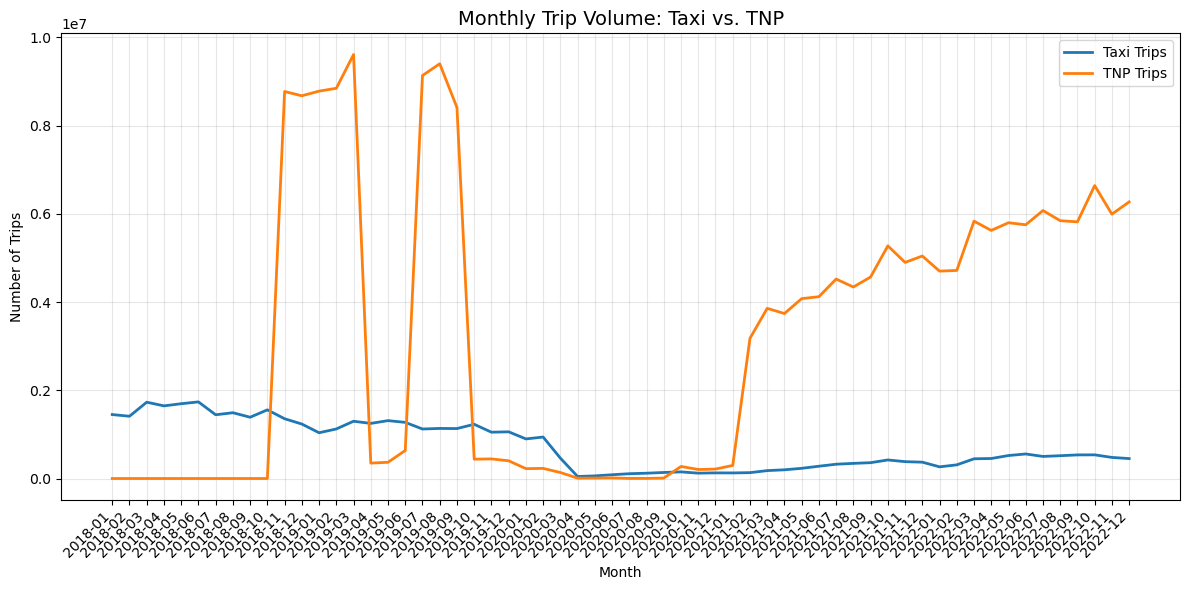

Total Taxi trips: 44,340,706
Total TNP trips:  192,566,939
TNP had more total trips overall during the observed period.


In [ ]:
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt

taxi = spark.read.parquet("gs://qst843-team8-central1/processed/taxi_clean_parquet")
tnp  = spark.read.parquet("gs://qst843-team8-central1/processed/tnp_clean_parquet")

taxi = taxi.withColumn("trip_date", F.to_date("trip_start_timestamp"))
tnp  = tnp.withColumn("trip_date",  F.to_date("trip_start_timestamp"))

taxi_daily = taxi.groupBy("trip_date").agg(F.count("*").alias("taxi_trips"))
tnp_daily  = tnp.groupBy("trip_date").agg(F.count("*").alias("tnp_trips"))

trends = (
    taxi_daily.join(tnp_daily, on="trip_date", how="outer")
              .fillna(0)
              .orderBy("trip_date")
)

pdf = trends.toPandas()

pdf["month"] = pd.to_datetime(pdf["trip_date"]).dt.to_period("M")
monthly = pdf.groupby("month")[["taxi_trips", "tnp_trips"]].sum().reset_index()
monthly["month"] = monthly["month"].astype(str)

plt.figure(figsize=(12,6))
plt.plot(monthly["month"], monthly["taxi_trips"], label="Taxi Trips", linewidth=2)
plt.plot(monthly["month"], monthly["tnp_trips"], label="TNP Trips", linewidth=2)

plt.title("Monthly Trip Volume: Taxi vs. TNP", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

total_taxi = monthly["taxi_trips"].sum()
total_tnp  = monthly["tnp_trips"].sum()

print(f"Total Taxi trips: {total_taxi:,}")
print(f"Total TNP trips:  {total_tnp:,}")

if total_taxi > total_tnp:
    print("Taxi had more total trips overall during the observed period.")
else:
    print("TNP had more total trips overall during the observed period.")

**Analysis**

This graph shows the significant shift in Chicago’s ride-hailing market between 2018 and 2022. *TNP's dominate in the post-pandemic era.*

* There are some abnormal spikes in TNP’s volume prior to the pandemic that we will investigate further in the next phase to determine if this is due to special circumstances or data quality issues. Over this same period, Taxi volume follows a slow, seemingly more realistic, gradual decrease, leading up to the pandemic.

* As expected, both Taxi and TNP saw their volumes near flatline during the peak of the pandemic from roughly 03/2020 to 11/2020, when a slight increase can be seen, coinciding with growing “quarantine fatigue” and the holidays when people started to become more publicly active, even in the face of still-strict social distancing requirements.

* The most notable trend on the entire graph is what happened starting in roughly 03/2021 through the end of the data window: A period when things were starting to look better, peak “quarantine fatigue,” and loosening of restrictions were looking imminent. At this point, Taxi trip volume remained mostly flat, with a subtle increase. In contrast, TNP volume exploded and then steadily increased, creating a massive gap over taxi trips and completely altering the pre-COVID dynamic in which taxis maintained strong, consistent trip volume.

* This post-pandemic changing of the guard can likely be attributed to an increase in TNP drivers (supply) during the pandemic, where individuals sought extra income in the face of unemployment and/or boredom, in conjunction with the explosion and solidification of the platform economy that came during the pandemic, as individuals and companies relied more heavily on digital platforms for daily activities in lieu of venturing into the public. While the easing of restrictions relegated certain platforms to no longer being “necessary,” society’s acceptance of these services through the pandemic made them an ultra-convenient staple of daily life.

### **Q2: Fare difference between Taxi and TNP**

Spark session OK.


Aligned period: 2018-11-01 → 2022-12-31


25/11/04 19:27:52 WARN Instrumentation: [68f7fff9] regParam is zero, which might cause numerical instability and overfitting.
25/11/04 19:28:08 WARN Instrumentation: [20490d63] regParam is zero, which might cause numerical instability and overfitting.


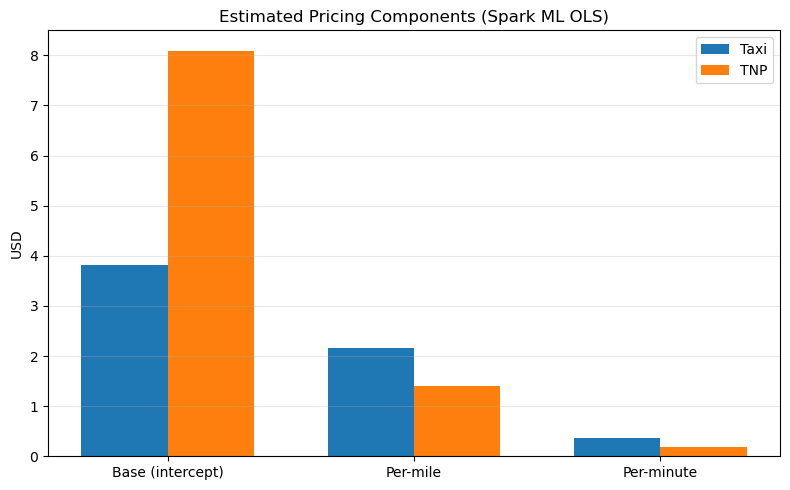

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    _ = spark.range(1).count()
    print("Spark session OK.")
except Exception as e:
    print("Spark died, recreating...", e)
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.getOrCreate()
    print("Spark re-created:", spark.range(1).count())

# --- helpers ---
def ensure_date(df, ts="trip_start_timestamp", out="trip_date"):
    if out not in df.columns:
        df = df.withColumn(out, F.to_date(F.col(ts)))
    return df

def clip_numeric(df, col, lo, hi):
    return df.filter((F.col(col) >= F.lit(lo)) & (F.col(col) <= F.lit(hi)))

def prep(df):
    df = ensure_date(df)
    df = clip_numeric(df, "trip_miles",   0.1, 50.0)
    df = clip_numeric(df, "trip_seconds", 60.0, 7200.0)  # 1–120 minutes
    df = clip_numeric(df, "trip_total",   1.0, 300.0)
    df = df.withColumn("trip_minutes", F.col("trip_seconds")/60.0)
    return df

def align_period(tx, tp):
    t1 = tx.agg(F.min("trip_date").alias("min_d"), F.max("trip_date").alias("max_d")).first()
    t2 = tp.agg(F.min("trip_date").alias("min_d"), F.max("trip_date").alias("max_d")).first()
    start_d = max(t1.min_d, t2.min_d); end_d = min(t1.max_d, t2.max_d)
    return (tx.filter((F.col("trip_date")>=F.lit(start_d)) & (F.col("trip_date")<=F.lit(end_d))),
            tp.filter((F.col("trip_date")>=F.lit(start_d)) & (F.col("trip_date")<=F.lit(end_d))),
            start_d, end_d)

def fmt(x):
    return f"${x:,.2f}"

spark.conf.set("spark.sql.shuffle.partitions", "200")  # keep shuffles modest
taxi0 = prep(taxi_p); tnp0 = prep(tnp_p)
taxi, tnp, start_d, end_d = align_period(taxi0, tnp0)
print(f"Aligned period: {start_d} → {end_d}")

def fit_lr(df, frac=0.03, cap=200_000, seed=7):
    sdf = (df.select("trip_total","trip_miles","trip_minutes")
             .dropna()
             .sample(False, frac, seed)
             .orderBy(F.rand(seed))
             .limit(cap))
    assembler = VectorAssembler(inputCols=["trip_miles","trip_minutes"], outputCol="features")
    vec = assembler.transform(sdf).select("features", F.col("trip_total").alias("label"))
    lr  = LinearRegression(featuresCol="features", labelCol="label", maxIter=50, regParam=0.0, elasticNetParam=0.0, fitIntercept=True)
    return lr.fit(vec)

tx_model = fit_lr(taxi)
tp_model = fit_lr(tnp)

alpha_tx = float(tx_model.intercept); beta_m_tx, beta_t_tx = map(float, tx_model.coefficients)
alpha_tp = float(tp_model.intercept); beta_m_tp, beta_t_tp = map(float, tp_model.coefficients)

labels = ["Base (intercept)", "Per-mile", "Per-minute"]
taxi_vals = [alpha_tx, beta_m_tx, beta_t_tx]
tnp_vals  = [alpha_tp,  beta_m_tp, beta_t_tp]

x = np.arange(len(labels)); w = 0.35
plt.figure(figsize=(8,5))
plt.bar(x - w/2, taxi_vals, width=w, label="Taxi")
plt.bar(x + w/2, tnp_vals,  width=w, label="TNP")
plt.xticks(x, labels)
plt.title("Estimated Pricing Components (Spark ML OLS)")
plt.ylabel("USD")
plt.legend(); plt.grid(alpha=0.3, axis="y"); plt.tight_layout(); plt.show()

base_who    = "Taxi" if alpha_tx > alpha_tp else "TNP"
permile_who = "Taxi" if beta_m_tx  > beta_m_tp else "TNP"
permin_who  = "Taxi" if beta_t_tx  > beta_t_tp else "TNP"

**Analysis**

This graph shows the breakdown of pricing (\$) between Taxis and TNPs. First TNPs charge more upfront, with a higher base fare of \~8.10, while taxis charge significantly less at \~3.80. Conversely, Taxis charge more per mile (\~2.20) and per minute (\~0.40) than TNPs, with prices at \~1.45 per mile and ~0.20 per minute.

We found that using a simple linear regression to demonstrate total cost differences and the breakdown of that cost was most effective, as the additional charges between the two modes were not uniform. This provides a simple way to blend those additional charges together and accurately compare the total cost.

With this model, we can forecast trip cost based on a combination of base fare, trip distance, and trip time. Using the constants above and assuming an average urban travel speed of 15 mph, one can compare the costs of the different modes at varying distances and times. i.e., 1 mile TNP trip = 8.10 \+ (1 mile \* 1.45 ) \+ (4 min \* 0.20). The varying costs of trips between 1 and 20 miles can be seen in the table below:

*Total Trip Costs ($) by Distance & Time*

| Miles | Minutes | Taxi Cost | TNP Cost | Cheaper Option |
|-------|---------|-----------|----------|----------------|
| 1     | 4       | 7.60     | 10.05   | Taxi (saves 2.45) |
| 2     | 8       | 10.00    | 12.30   | Taxi (saves 2.30) |
| 5     | 20      | 17.80    | 19.45   | Taxi (saves 1.65) |
| 10    | 40      | 29.80    | 30.60   | Taxi (saves 0.80) |
| 15    | 60      | 41.80    | 41.75   | Equal |
| 20    | 80      | 53.80    | 52.90   | TNP (saves 0.90) |

From a cost perspective, Taxis are the better option, especially since Q3 shows the majority of trips across modes are 6 miles or less (An expected dynamic in an urban setting). Given that Taxis are cheaper for trips of 15 miles or less, it is clearly the cheaper mode of urban transportation in Chicago.

However, given that Q1 shows TNPs command exponentially higher volume than Taxis in the post-pandemic era, customers are evidently not persuaded by the “savings” provided by Taxis. This is likely for two reasons:

1. While Taxis are cheaper up to 15 miles, the difference is small and diminishes with every increase in distance. Say a 1-mile taxi trip was 5.00 compared to a TNP’s 10.05, that 5.05 savings carries much more weight than the existing 2.45. Even more, this 2.45 is the maximum savings that can be achieved, so racking up
significant savings by choosing taxis would require many trips.

2. People are willing to pay more for convenience, and they do not have to pay *that much* more for it. While a rider may be able to save 2.45 by taking a taxi 1 mile, if it takes 10 minutes to locate a taxi, the user could pay a little to have the TNP arrive sooner while knowing its exact ETA. These days, convenience is everything, and for many people who are already willing to pay for a car to drive them somewhere, time is money, explaining why we see TNPs' volume taking off relative to taxis amid generally higher costs.


### **Q3: Variation in Trip Distance between Taxis and TNPs**

=== Overall trip-length stats (miles) ===
mode     trips  mean_miles  median_miles  p10   p90
 TNP 192345998    6.512400           3.9 1.10 16.40
Taxi  44129280    4.783874           1.8 0.58 16.28


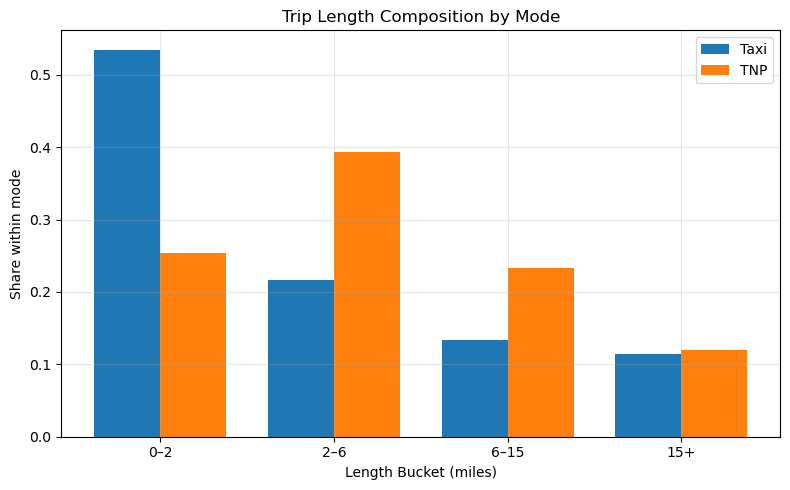

In [ ]:
from pyspark.sql import functions as F
from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TAXI_PARQUET = "gs://qst843-team8-central1/processed/taxi_clean_parquet"
TNP_PARQUET  = "gs://qst843-team8-central1/processed/tnp_clean_parquet"

MIN_MILES = 0.1
MAX_MILES = 50.0

# histogram bin width and cap for plot A
BIN_WIDTH = 0.5
MAX_BIN_EDGE = 20.0

COMMUNITY_CANDIDATES = ["pickup_community_area", "pickup_community", "community_area", "pickup_area"]

taxi = spark.read.parquet(TAXI_PARQUET)
tnp  = spark.read.parquet(TNP_PARQUET)

def pick_first_existing(df, candidates):
    cols = set([c.lower() for c in df.columns])
    for c in candidates:
        if c.lower() in cols:
            return c
    return None

trip_miles_col_taxi = pick_first_existing(taxi, ["trip_miles"])
trip_miles_col_tnp  = pick_first_existing(tnp,  ["trip_miles"])
if not trip_miles_col_taxi or not trip_miles_col_tnp:
    raise ValueError("Cannot find 'trip_miles' column in Taxi/TNP data.")

community_col_taxi = pick_first_existing(taxi, COMMUNITY_CANDIDATES)
community_col_tnp  = pick_first_existing(tnp,  COMMUNITY_CANDIDATES)

def prep(df, mode_name, miles_col, community_col):
    base = (df
            .withColumn("trip_miles", F.col(miles_col).cast("double"))
            .filter((F.col("trip_miles") >= MIN_MILES) & (F.col("trip_miles") <= MAX_MILES))
            .select("trip_miles", *( [community_col] if community_col else [] ))
           )
    if community_col:
        base = base.withColumnRenamed(community_col, "community")
    else:
        base = base.withColumn("community", F.lit("Unknown"))
    return base.withColumn("mode", F.lit(mode_name))

taxi_s = prep(taxi, "Taxi", trip_miles_col_taxi, community_col_taxi)
tnp_s  = prep(tnp,  "TNP",  trip_miles_col_tnp,  community_col_tnp)
both   = taxi_s.unionByName(tnp_s)

overall = (both.groupBy("mode")
           .agg(
               F.count("*").alias("trips"),
               F.avg("trip_miles").alias("mean_miles"),
               F.expr("percentile_approx(trip_miles, 0.5)").alias("median_miles"),
               F.expr("percentile_approx(trip_miles, 0.1)").alias("p10"),
               F.expr("percentile_approx(trip_miles, 0.9)").alias("p90")
           )
          ).toPandas().sort_values("mode")
print("=== Overall trip-length stats (miles) ===")
print(overall.to_string(index=False))

def bucket_expr(miles_col):
    return (F.when((F.col(miles_col) < 2), F.lit("0–2"))
              .when((F.col(miles_col) >= 2) & (F.col(miles_col) < 6), F.lit("2–6"))
              .when((F.col(miles_col) >= 6) & (F.col(miles_col) < 15), F.lit("6–15"))
              .otherwise(F.lit("15+"))
           )

both_buck = both.withColumn("len_bucket", bucket_expr("trip_miles"))
bucket_counts = (both_buck.groupBy("mode", "len_bucket").agg(F.count("*").alias("cnt")))
totals2 = bucket_counts.groupBy("mode").agg(F.sum("cnt").alias("total"))
bucket_share = (bucket_counts.join(totals2, on="mode", how="inner")
                .withColumn("share", F.col("cnt")/F.col("total"))
               )

bucket_pdf = (bucket_share
              .groupBy("len_bucket")
              .pivot("mode")
              .agg(F.first("share"))
              .toPandas()
             ).fillna(0.0)

bucket_order = ["0–2", "2–6", "6–15", "15+"]
bucket_pdf = bucket_pdf.set_index("len_bucket").reindex(bucket_order).reset_index()

plt.figure(figsize=(8,5))
x = np.arange(len(bucket_pdf))
width = 0.38
if "Taxi" in bucket_pdf.columns and "TNP" in bucket_pdf.columns:
    plt.bar(x - width/2, bucket_pdf["Taxi"].values, width, label="Taxi")
    plt.bar(x + width/2, bucket_pdf["TNP"].values, width, label="TNP")
elif "Taxi" in bucket_pdf.columns:
    plt.bar(x, bucket_pdf["Taxi"].values, width, label="Taxi")
elif "TNP" in bucket_pdf.columns:
    plt.bar(x, bucket_pdf["TNP"].values, width, label="TNP")

plt.title("Trip Length Composition by Mode")
plt.xlabel("Length Bucket (miles)")
plt.ylabel("Share within mode")
plt.xticks(x, bucket_order)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis**

From this graph, we see that across modes, the majority of trips are between 0 and 6 miles, with Taxi trips having a median of 1.8 miles and TNPs having a median of 3.9 miles.

However, the spread within the modes is different:

* *Taxi*: Over 50% of taxi trips are between 0 and 2 miles and steadily decrease in share as the distance increases. This is likely because taxis are concentrated in the more densely populated and traveled areas of the city's heart, where they can easily and frequently pick up passengers looking to travel short distances. Given that taxis are less likely to patrol less-populated areas on the outskirts or in the suburbs, longer trips to these areas are infrequent, and even less so from them.

* *TNP*: 40% of TNP trips are between 2 and 6 miles, with almost 25% being between 6 and 15 miles. This trend is likely the inverse of Taxis: Riders away from the most trafficked areas are aware that they are unlikely to hail a taxi on the street, but can easily summon a nearby TNP to efficiently traverse the city without waiting for an elusive Taxi.

Again, this trend exemplifies how riders value TNPs' convenience and reliability. The ability of TNPs to easily accommodate rides of all distances and in many locations expands the addressable geographic market of cars for hire, increasing their high volume. Subsequently, even if riders find themselves in areas flush with Taxis, they still frequently turn to their reliable TNPs because they are accustomed to them and know what they are getting.


### **Q4: Popular Pickup Locations for Taxis and TNPs**

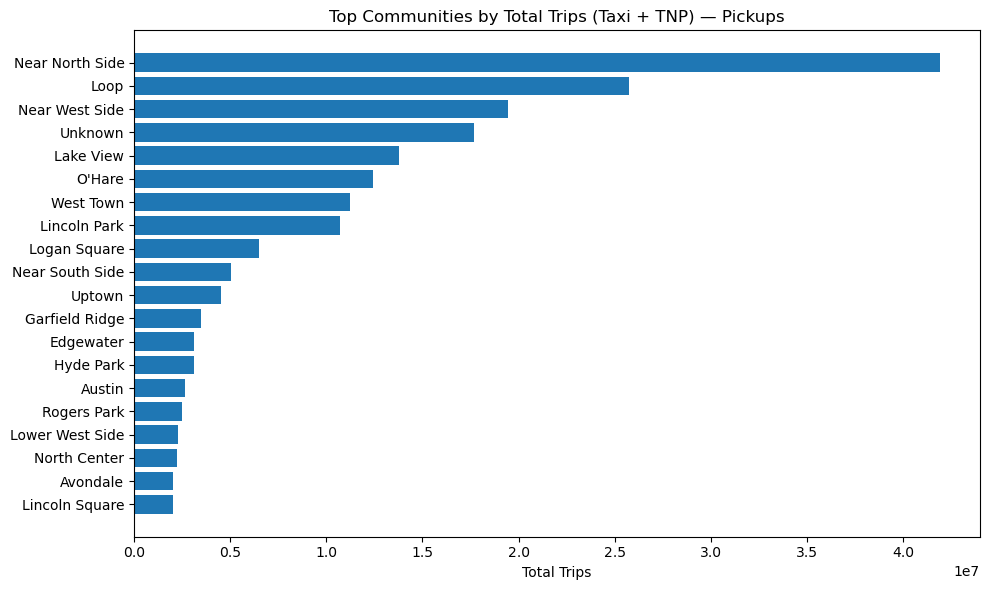

In [ ]:
from pyspark.sql import functions as F, types as T
import pandas as pd
import matplotlib.pyplot as plt

TOP_N = 20
PICKUP_CANDS  = ["pickup_community_area","pickup_community","community_area_pickup","pickup_area"]
DROPOFF_CANDS = ["dropoff_community_area","dropoff_community","community_area_dropoff","dropoff_area"]

community_map_list = [
    (1,"Rogers Park"),(2,"West Ridge"),(3,"Uptown"),(4,"Lincoln Square"),(5,"North Center"),
    (6,"Lake View"),(7,"Lincoln Park"),(8,"Near North Side"),(9,"Edison Park"),(10,"Norwood Park"),
    (11,"Jefferson Park"),(12,"Forest Glen"),(13,"North Park"),(14,"Albany Park"),(15,"Portage Park"),
    (16,"Irving Park"),(17,"Dunning"),(18,"Montclare"),(19,"Belmont Cragin"),(20,"Hermosa"),
    (21,"Avondale"),(22,"Logan Square"),(23,"Humboldt Park"),(24,"West Town"),(25,"Austin"),
    (26,"West Garfield Park"),(27,"East Garfield Park"),(28,"Near West Side"),(29,"North Lawndale"),
    (30,"South Lawndale"),(31,"Lower West Side"),(32,"Loop"),(33,"Near South Side"),
    (34,"Armour Square"),(35,"Douglas"),(36,"Oakland"),(37,"Fuller Park"),(38,"Grand Boulevard"),
    (39,"Kenwood"),(40,"Washington Park"),(41,"Hyde Park"),(42,"Woodlawn"),(43,"South Shore"),
    (44,"Chatham"),(45,"Avalon Park"),(46,"South Chicago"),(47,"Burnside"),(48,"Calumet Heights"),
    (49,"Roseland"),(50,"Pullman"),(51,"South Deering"),(52,"East Side"),(53,"West Pullman"),
    (54,"Riverdale"),(55,"Hegewisch"),(56,"Garfield Ridge"),(57,"Archer Heights"),(58,"Brighton Park"),
    (59,"McKinley Park"),(60,"Bridgeport"),(61,"New City"),(62,"West Elsdon"),(63,"Gage Park"),
    (64,"Clearing"),(65,"West Lawn"),(66,"Chicago Lawn"),(67,"West Englewood"),(68,"Englewood"),
    (69,"Greater Grand Crossing"),(70,"Ashburn"),(71,"Auburn Gresham"),(72,"Beverly"),
    (73,"Washington Heights"),(74,"Mount Greenwood"),(75,"Morgan Park"),(76,"O'Hare"),(77,"Edgewater")
]
map_df = spark.createDataFrame(community_map_list, "community_id int, community_name string")

def pick_col(df, cands):
    lc = {c.lower(): c for c in df.columns}
    for c in cands:
        if c.lower() in lc: return lc[c.lower()]
    return None

def add_name(df, raw_col):
    df1 = df.withColumn("raw_str", F.col(raw_col).cast("string"))
    df1 = df1.withColumn("raw_int", F.when(F.col("raw_str").rlike(r"^[0-9]+$"), F.col("raw_str").cast("int")))
    df1 = (df1.join(map_df, df1.raw_int == map_df.community_id, "left")
              .withColumn("community_name",
                          F.coalesce(F.col("community_name"), F.col("raw_str")))
              .withColumn("community_name",
                          F.when(F.col("community_name").isNull(), F.lit("Unknown"))
                           .otherwise(F.col("community_name")))
              .drop("raw_int","community_id"))
    return df1

use_pickup = True

taxi_col  = pick_col(taxi,  PICKUP_CANDS if use_pickup else DROPOFF_CANDS)
tnp_col   = pick_col(tnp,   PICKUP_CANDS if use_pickup else DROPOFF_CANDS)
assert taxi_col and tnp_col, "Cannot find community columns."

taxi_named = add_name(taxi, taxi_col)
tnp_named  = add_name(tnp,  tnp_col)

taxi_counts = (taxi_named.groupBy("community_name")
               .agg(F.count("*").alias("taxi_trips")))
tnp_counts  = (tnp_named.groupBy("community_name")
               .agg(F.count("*").alias("tnp_trips")))

combo = (taxi_counts.join(tnp_counts, on="community_name", how="outer")
                     .fillna(0)
                     .withColumn("total", F.col("taxi_trips")+F.col("tnp_trips"))
                     .orderBy(F.desc("total"))
                     .limit(TOP_N))

pdf = combo.toPandas().sort_values("total", ascending=False)
pdf["community_name"] = pdf["community_name"].fillna("Unknown").astype(str)

plt.figure(figsize=(10, 6))
plt.barh(range(len(pdf)), pdf["total"])
plt.yticks(range(len(pdf)), pdf["community_name"])
plt.gca().invert_yaxis()
plt.title("Top Communities by Total Trips (Taxi + TNP) — " + ("Pickups" if use_pickup else "Drop-offs"))
plt.xlabel("Total Trips")
plt.tight_layout()
plt.show()

**Analysis**

To understand travel demand patterns across Chicago, we computed the top 20 community areas by combined trip volume (taxi + TNP) using available pickup community identifiers. Community names were standardized by mapping numeric codes to Chicago’s official community area list. We then aggregated total trips by zone and ranked the highest-demand locations.

Areas like The Loop, Near North Side, West Town, and Lake View dominate trip volume, reflecting dense employment centers, major entertainment districts, and high residential density. The strong showing of O’Hare also stands out, which aligns with airport-driven ride demand and continued taxi market relevance on long-distance airport trips.

This distribution emphasizes that trip demand is not uniform across the city, a relatively small number of community areas account for a disproportionately large share of total rides.

### **Q5: Efficiency of Trips across Modes (Time/Distance)**

=== Overall time vs distance (robust trims applied) ===
mode     trips  avg_miles  avg_seconds  median_sec_per_mile  p90_sec_per_mile   avg_mph
 TNP 188206965   6.125623  1052.076875           222.222222         380.25641 18.823959
Taxi  39930767   5.110202   974.310020           298.965517         520.00000 15.911945


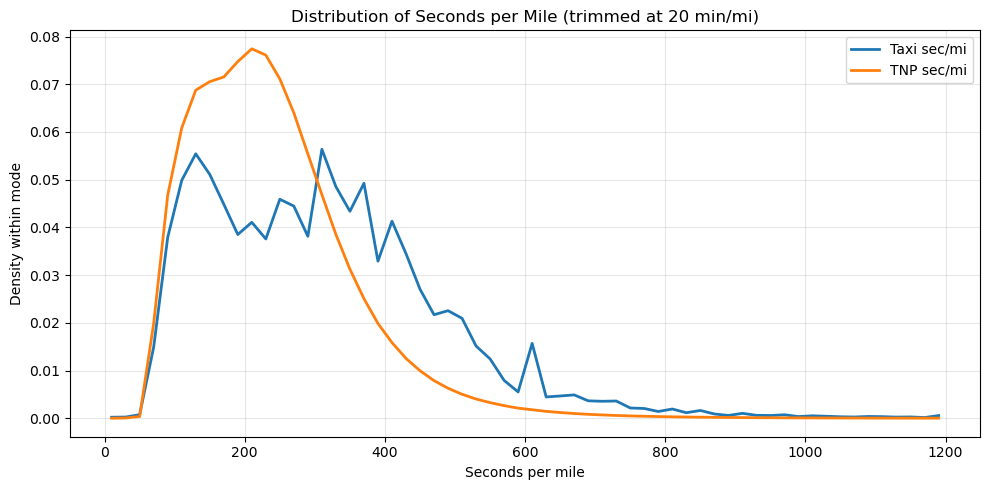

In [ ]:
from pyspark.sql import functions as F
from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TAXI_PARQUET = "gs://qst843-team8-central1/processed/taxi_clean_parquet"
TNP_PARQUET  = "gs://qst843-team8-central1/processed/tnp_clean_parquet"

MIN_MILES = 0.5
MAX_MILES = 30.0
MIN_SECONDS = 60
MAX_SPM = 1200.0

MAX_BIN_EDGE = 20
TARGET_MILE_BIN = 2
TOP_N_COMMUNITIES = 15

COMMUNITY_CANDIDATES = ["pickup_community_area", "pickup_community", "community_area", "pickup_area"]

taxi = spark.read.parquet(TAXI_PARQUET)
tnp  = spark.read.parquet(TNP_PARQUET)

def pick_first_existing(df, candidates):
    cols = set([c.lower() for c in df.columns])
    for c in candidates:
        if c.lower() in cols:
            return c
    return None

def prep_minimal(df, mode_name):
    miles_col   = pick_first_existing(df, ["trip_miles"])
    seconds_col = pick_first_existing(df, ["trip_seconds"])
    comm_col    = pick_first_existing(df, COMMUNITY_CANDIDATES)

    if not miles_col or not seconds_col:
        raise ValueError(f"{mode_name}: required columns not found (trip_miles / trip_seconds).")

    base = (df
        .withColumn("trip_miles",   F.col(miles_col).cast("double"))
        .withColumn("trip_seconds", F.col(seconds_col).cast("double"))
        .filter(
            (F.col("trip_miles") >= MIN_MILES) & (F.col("trip_miles") <= MAX_MILES) &
            (F.col("trip_seconds") >= MIN_SECONDS)
        )
    )
    if comm_col:
        base = base.withColumn("community", F.col(comm_col).cast("string"))
    else:
        base = base.withColumn("community", F.lit("Unknown"))

    base = (base
        .withColumn("sec_per_mile", (F.col("trip_seconds") / F.col("trip_miles")).cast("double"))
        .withColumn("mph", (F.lit(3600.0) * F.col("trip_miles") / F.col("trip_seconds")).cast("double"))
        .filter( (F.col("sec_per_mile") > 0) & (F.col("sec_per_mile") <= MAX_SPM) )
        .withColumn("mode", F.lit(mode_name))
    )

    max_bin = int(MAX_BIN_EDGE)
    base = (base
        .withColumn("mile_bin_raw", F.floor(F.col("trip_miles")).cast("int"))
        .withColumn("mile_bin", F.when(F.col("mile_bin_raw") >= max_bin, F.lit(max_bin)).otherwise(F.col("mile_bin_raw")))
    )
    return base.select("mode","trip_miles","trip_seconds","sec_per_mile","mph","mile_bin","community")

taxi_s = prep_minimal(taxi, "Taxi")
tnp_s  = prep_minimal(tnp,  "TNP")
both   = taxi_s.unionByName(tnp_s)

overall = (both.groupBy("mode")
    .agg(
        F.count("*").alias("trips"),
        F.avg("trip_miles").alias("avg_miles"),
        F.avg("trip_seconds").alias("avg_seconds"),
        F.expr("percentile_approx(sec_per_mile, 0.5)").alias("median_sec_per_mile"),
        F.expr("percentile_approx(sec_per_mile, 0.9)").alias("p90_sec_per_mile"),
        F.avg("mph").alias("avg_mph")
    )
    .orderBy("mode")
).toPandas()

print("=== Overall time vs distance (robust trims applied) ===")
print(overall.to_string(index=False))

def spm_hist(df, col="sec_per_mile", n_bins=50, max_x=MAX_SPM):
    width = max_x / n_bins
    idx = F.floor(F.col(col) / F.lit(width)).cast("int")
    idx = F.when(idx >= n_bins, n_bins-1).otherwise(idx)
    binned = (df.withColumn("bin_idx", idx)
                .groupBy("bin_idx")
                .agg(F.count("*").alias("cnt")))
    total = binned.agg(F.sum("cnt").alias("total")).first()["total"]
    pdf = binned.orderBy("bin_idx").toPandas()
    if total and total > 0:
        pdf["density"] = pdf["cnt"] / total
    else:
        pdf["density"] = 0.0
    pdf["x"] = (pdf["bin_idx"] + 0.5) * width
    return pdf[["x","density"]]

taxi_hist = spm_hist(taxi_s, "sec_per_mile", n_bins=60, max_x=MAX_SPM)
tnp_hist  = spm_hist(tnp_s,  "sec_per_mile", n_bins=60, max_x=MAX_SPM)

plt.figure(figsize=(10,5))
plt.plot(taxi_hist["x"], taxi_hist["density"], linewidth=2, label="Taxi sec/mi")
plt.plot(tnp_hist["x"],  tnp_hist["density"],  linewidth=2, label="TNP sec/mi")
plt.title("Distribution of Seconds per Mile (trimmed at 20 min/mi)")
plt.xlabel("Seconds per mile")
plt.ylabel("Density within mode")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis**


This chart compares trip efficiency between taxis and TNPs (Uber/Lyft) by plotting the distribution of seconds per mile, a congestion-adjusted travel-speed measure. To remove noise from extreme cases, we trim at 20 minutes per mile. The distribution shows that TNP trips are generally clustered more tightly around ~75-350 sec/mile, or about 10–48 mph, while taxi trips display a broader spread with a heavier right-tail.

The graph indicates that taxis experience more frequent slow-moving conditions than TNPs do. This could be due to a variety of factors like, operational inefficiencies, types of trips or less real-time routing optimization. At the fastest end of the spectrum (under ~200 sec/mile), both modes behave similarly, suggesting comparable performance when traffic flows freely.

### **Critical Observations & Looking Forward**

From our initial analysis, we found that, on average, TNPs are slightly more expensive than Taxis but have captured the majority of the Chicago ride-hailing market. While functional differences between the two modes exist, they provide the same exact service to the point where, even though consumers gravitate towards TNPs today, those same consumers would be very unlikely to pull out their phone and hail a TNP if an available Taxi were directly in front of them.

This key insight is what motivated our machine learning efforts. Specifically, since we now understand that convenience/reliability is driving the difference in rider volume between the modes, it is clear that providing accurate location-based demand predictions can help both Taxis and TNPs better serve customers. In theory, if Taxis utilize our predictions, they can know which areas have the highest demand at specific times on specific days, and can somewhat make up for what they lack relative to TNPs in algorithmic matching by frequenting areas where they are likely to be needed. While this has the potential to cut into the TNPs' market share, it gives opportunistic TNP drivers the ability to better pinpoint where they are likely to be matched and get quicker access to trips.

Ultimately, the greatest beneficiaries of this change in market dynamics would be the riders: If riders find themselves in high-demand areas, they will have access to more Taxis and TNPs than in previous times, which will decrease wait times and likely decrease prices as increased supply will limit the TNP’s ability to charge the premiums that come with “surges” where demand vastly outpaces supply.


## **Necessary Loading/Setup for Final Phase**

### **Combined FHV Data - Aggreated Demand for Indiviudal Neighborhoods by 15-minute Windows**

In [ ]:
from pyspark.sql import SparkSession

df = spark.read.parquet("gs://qst843-team8-central1/processed/agg_demand_15m_by_area/")
df.show(5)
df.printSchema()

+-------------------+---------------------+-----------------+-----------------------+------------------+
|      timestamp_15m|pickup_community_area|rides_count_total|avg_trip_miles_weighted| avg_fare_weighted|
+-------------------+---------------------+-----------------+-----------------------+------------------+
|2021-06-22 15:15:00|                   76|               79|     16.862025316455693|45.148860759493665|
|2020-03-09 16:15:00|                   -1|               45|      4.741777777777778|16.293555555555557|
|2018-07-10 12:45:00|                   32|              300|     2.0232666666666668|           11.3676|
|2019-02-27 22:30:00|                   56|               66|     14.493787878787877| 35.84848484848484|
|2020-02-14 12:00:00|                   -1|               59|       4.44135593220339|17.346271186440678|
+-------------------+---------------------+-----------------+-----------------------+------------------+
only showing top 5 rows

root
 |-- timestamp_15m: times

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import types as T

community_map_list = [
    (1,"Rogers Park"),(2,"West Ridge"),(3,"Uptown"),(4,"Lincoln Square"),(5,"North Center"),
    (6,"Lake View"),(7,"Lincoln Park"),(8,"Near North Side"),(9,"Edison Park"),(10,"Norwood Park"),
    (11,"Jefferson Park"),(12,"Forest Glen"),(13,"North Park"),(14,"Albany Park"),(15,"Portage Park"),
    (16,"Irving Park"),(17,"Dunning"),(18,"Montclare"),(19,"Belmont Cragin"),(20,"Hermosa"),
    (21,"Avondale"),(22,"Logan Square"),(23,"Humboldt Park"),(24,"West Town"),(25,"Austin"),
    (26,"West Garfield Park"),(27,"East Garfield Park"),(28,"Near West Side"),(29,"North Lawndale"),
    (30,"South Lawndale"),(31,"Lower West Side"),(32,"Loop"),(33,"Near South Side"),
    (34,"Armour Square"),(35,"Douglas"),(36,"Oakland"),(37,"Fuller Park"),(38,"Grand Boulevard"),
    (39,"Kenwood"),(40,"Washington Park"),(41,"Hyde Park"),(42,"Woodlawn"),(43,"South Shore"),
    (44,"Chatham"),(45,"Avalon Park"),(46,"South Chicago"),(47,"Burnside"),(48,"Calumet Heights"),
    (49,"Roseland"),(50,"Pullman"),(51,"South Deering"),(52,"East Side"),(53,"West Pullman"),
    (54,"Riverdale"),(55,"Hegewisch"),(56,"Garfield Ridge"),(57,"Archer Heights"),(58,"Brighton Park"),
    (59,"McKinley Park"),(60,"Bridgeport"),(61,"New City"),(62,"West Elsdon"),(63,"Gage Park"),
    (64,"Clearing"),(65,"West Lawn"),(66,"Chicago Lawn"),(67,"West Englewood"),(68,"Englewood"),
    (69,"Greater Grand Crossing"),(70,"Ashburn"),(71,"Auburn Gresham"),(72,"Beverly"),
    (73,"Washington Heights"),(74,"Mount Greenwood"),(75,"Morgan Park"),(76,"O'Hare"),(77,"Edgewater")
]

schema = T.StructType([
    T.StructField("pickup_community_area", T.IntegerType(), False),
    T.StructField("community_name", T.StringType(), False)
])

community_df = spark.createDataFrame(community_map_list, schema=schema)

# Basic cleaning: drop negative / 0 area codes
df_clean = df.filter(F.col("pickup_community_area") > 0)

# Add community_name
df_named = df_clean.join(community_df, on="pickup_community_area", how="left")

# Derived metrics (interval-level proxies)
df_feat = (df_named
    .filter(F.col("pickup_community_area") > 0)
    .withColumn("fare_per_mile",
                F.col("avg_fare_weighted") / F.when(F.col("avg_trip_miles_weighted") > 0, F.col("avg_trip_miles_weighted")))
    .withColumn("revenue_proxy", F.col("rides_count_total") * F.col("avg_fare_weighted"))
    .withColumn("vmt_proxy", F.col("rides_count_total") * F.col("avg_trip_miles_weighted"))  # vehicle-miles proxy
    .withColumn("hour", F.hour("timestamp_15m"))
)

df_named.show(5)
df_named.printSchema()


+---------------------+-------------------+-----------------+-----------------------+------------------+--------------+
|pickup_community_area|      timestamp_15m|rides_count_total|avg_trip_miles_weighted| avg_fare_weighted|community_name|
+---------------------+-------------------+-----------------+-----------------------+------------------+--------------+
|                    3|2019-11-30 13:30:00|                3|      7.173333333333333|19.433333333333334|        Uptown|
|                    3|2022-09-13 08:15:00|               43|      7.460930232558139| 35.99725214198287|        Uptown|
|                    5|2018-11-07 22:30:00|               48|     3.8708333333333336|10.009166666666667|  North Center|
|                    6|2021-03-06 23:30:00|              246|      4.176463414634145|20.503943089430894|     Lake View|
|                    6|2019-01-19 00:15:00|              488|     3.5541803278688526|10.697663934426231|     Lake View|
+---------------------+-----------------

In [ ]:
from pyspark.sql.functions import col, to_timestamp

# Ensure timestamp is parsed correctly
df2 = df.withColumn("timestamp_15m", to_timestamp("timestamp_15m"))

In [ ]:
filtered = (
    df2.filter(
        (col("timestamp_15m") >= "2021-02-01") &
        (col("timestamp_15m") <= "2022-12-31")
    )
    .select("timestamp_15m", "pickup_community_area", "rides_count_total")
)

In [ ]:
from pyspark.sql import functions as F

ts = (
    filtered
      .groupBy("timestamp_15m")
      .agg(F.sum("rides_count_total").alias("rides_count_total"))
      .orderBy("timestamp_15m")
)

ts.show(10)

# Convert to pandas (safe because this is aggregated)
pdf = ts.toPandas()

+-------------------+-----------------+
|      timestamp_15m|rides_count_total|
+-------------------+-----------------+
|2021-02-01 00:00:00|              582|
|2021-02-01 00:15:00|              516|
|2021-02-01 00:30:00|              482|
|2021-02-01 00:45:00|              409|
|2021-02-01 01:00:00|              365|
|2021-02-01 01:15:00|              302|
|2021-02-01 01:30:00|              256|
|2021-02-01 01:45:00|              240|
|2021-02-01 02:00:00|              239|
|2021-02-01 02:15:00|              193|
+-------------------+-----------------+
only showing top 10 rows



### **Weather Data**

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import SparkSession, functions as F
import re

spark = SparkSession.builder.getOrCreate()

WEATHER_PATH  = "gs://qst843-team8-central1/raw/chicago/Weather/WeatherData.csv"
AGG_PATH  = "gs://qst843-team8-central1/processed/agg_demand_15m_by_area/"
SHUFFLE_PARTS = 300


spark.conf.set("spark.sql.shuffle.partitions", str(SHUFFLE_PARTS))

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/12/09 04:28:30 INFO SparkEnv: Registering MapOutputTracker
25/12/09 04:28:30 INFO SparkEnv: Registering BlockManagerMaster
25/12/09 04:28:30 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
25/12/09 04:28:30 INFO SparkEnv: Registering OutputCommitCoordinator
25/12/09 04:28:32 WARN Utils: spark.executor.instances less than spark.dynamicAllocation.minExecutors is invalid, ignoring its setting, please update your configs.
25/12/09 04:28:36 WARN Utils: spark.executor.instances less than spark.dynamicAllocation.minExecutors is invalid, ignoring its setting, please update your configs.
25/12/09 04:28:39 WARN Utils: spark.executor.instances less than spark.dynamicAllocation.minExecutors is invalid, ignoring its setting, please update your configs.


In [ ]:
from pyspark.sql import functions as F

def parse_weather_hourly(df):
    """
    Input df columns: DATE, WND, TMP, AA1
    Output: one row per hour (minute == 53) with:
        weather_ts      - original timestamp
        weather_hour    - timestamp truncated to the hour
        temp_c          - air temperature in °C
        wind_gust_ms    - gust speed in m/s
        precip_mm       - precipitation in units (e.g., tenths-mm -> mm) for last 1 hour
    """

    # 1) Parse timestamp and keep only :53 rows (hourly METAR)
    df = (
        df
        .withColumn("weather_ts", F.to_timestamp("DATE"))
        .filter(F.minute("weather_ts") == 53)
    )

    # 2) Temperature (TMP: "TTTT,Q" where TTTT is tenths of °C)
    tmp_val = F.split(F.col("TMP"), ",").getItem(0).cast("int")

    df = (
        df
        .withColumn("temp_tenths_c", tmp_val)
        .withColumn(
            "temp_c",
            F.when(F.col("temp_tenths_c") == 9999, None)
             .otherwise(F.col("temp_tenths_c") / 10.0)
        )
    )

    # 3) Wind gust (WND: "DDDFF,Q,U,GGGG,Q" -> GGGG is gust in tenths m/s)
    wnd_split = F.split(F.col("WND"), ",")
    gust_tenths = wnd_split.getItem(3).cast("int")   # GGGG

    df = (
        df
        .withColumn("gust_tenths_ms", gust_tenths)
        .withColumn(
            "wind_gust_ms",
            F.when(F.col("gust_tenths_ms") == 9999, None)
             .otherwise(F.col("gust_tenths_ms") / 10.0)
        )
    )

    # 4) Precipitation (AA1: "PP,AAAA,C,Q")
    aa1_split = F.split(F.col("AA1"), ",")
    period          = aa1_split.getItem(0)
    precip_tenths   = aa1_split.getItem(1).cast("int")   # <-- FIX: index 1, not 2

    df = (
        df
        .withColumn("aa1_period", period)
        .withColumn("precip_tenths_raw", precip_tenths)
        .withColumn(
            "precip_mm",
            F.when(
                # use only 1-hour precip, and ignore missing 9999
                (F.col("aa1_period") == "01") &
                (F.col("precip_tenths_raw") != 9999),
                F.col("precip_tenths_raw") / 10.0
            ).otherwise(0.0)   # or None if you prefer "missing" instead of 0
        )
    )

    # 5) Hour-level key for joining to demand
    df = df.withColumn("weather_hour", F.date_trunc("hour", "weather_ts"))

    return df.select(
        "weather_ts",
        "weather_hour",
        "temp_c",
        "wind_gust_ms",
        "precip_mm"
    )


In [ ]:
weather_raw = (
    spark.read
         .option("header", True)
         .csv(WEATHER_PATH)   # your CSV path
)


weather_hourly = parse_weather_hourly(weather_raw)
weather_hourly.show(10, truncate=False)



print("WEATHER_RAW ROW COUNT ", weather_raw.count())
print("WEATHER_HOURLY ROW COUNT ", weather_hourly.count())

+-------------------+-------------------+------+------------+---------+
|weather_ts         |weather_hour       |temp_c|wind_gust_ms|precip_mm|
+-------------------+-------------------+------+------------+---------+
|2021-01-01 00:53:00|2021-01-01 00:00:00|-3.3  |0.0         |0.0      |
|2021-01-01 01:53:00|2021-01-01 01:00:00|-3.3  |1.5         |0.0      |
|2021-01-01 02:53:00|2021-01-01 02:00:00|-3.3  |1.5         |0.0      |
|2021-01-01 03:53:00|2021-01-01 03:00:00|-3.3  |0.0         |0.0      |
|2021-01-01 04:53:00|2021-01-01 04:00:00|-2.8  |0.0         |0.0      |
|2021-01-01 05:53:00|2021-01-01 05:00:00|-3.3  |0.0         |0.0      |
|2021-01-01 06:53:00|2021-01-01 06:00:00|-3.3  |2.1         |0.0      |
|2021-01-01 07:53:00|2021-01-01 07:00:00|-3.3  |2.6         |0.0      |
|2021-01-01 08:53:00|2021-01-01 08:00:00|-2.8  |3.1         |0.0      |
|2021-01-01 09:53:00|2021-01-01 09:00:00|-2.8  |3.1         |0.0      |
+-------------------+-------------------+------+------------+---

WEATHER_HOURLY ROW COUNT  17500


## **Machine Learning**

### Load Weather Data and Define Paths

In [ ]:
from pyspark.sql import SparkSession, functions as F
import re

WEATHER_DATA_PATH = "gs://qst843-team8-central1/processed/demand_15m_with_weather/"

weather_data = spark.read.parquet(WEATHER_DATA_PATH)

print("Loaded rows:", weather_data.count())
weather_data.show(10, truncate=False)





Loaded rows: 4898399
+-------------------+-------------------+---------------------+-----------------+-----------------------+------------------+-------------------+------+------------+---------+--------------+----------------+---------+-----------+-------------+---------------+--------------+----------------+-------------+---------------+
|weather_hour       |timestamp_15m      |pickup_community_area|rides_count_total|avg_trip_miles_weighted|avg_fare_weighted |weather_ts         |temp_c|wind_gust_ms|precip_mm|temp_prev_hour|precip_prev_hour|temp_yday|precip_yday|temp_week_ago|precip_week_ago|temp_month_ago|precip_month_ago|temp_year_ago|precip_year_ago|
+-------------------+-------------------+---------------------+-----------------+-----------------------+------------------+-------------------+------+------------+---------+--------------+----------------+---------+-----------+-------------+---------------+--------------+----------------+-------------+---------------+
|2021-09-21 12:0

### Clean Fields For ML and Check Length

In [ ]:

weather_data = weather_data.withColumn("hour",   F.hour("timestamp_15m"))
weather_data = weather_data.withColumn("dow",    F.dayofweek("timestamp_15m"))
weather_data = weather_data.withColumn("dom",    F.dayofmonth("timestamp_15m"))
weather_data = weather_data.withColumn("month",  F.month("timestamp_15m"))
weather_data = weather_data.withColumn("year",  F.year("timestamp_15m"))

weather_data = weather_data.withColumn(
    "minute_bucket",
    (F.minute("timestamp_15m") / 15).cast("int")
)

print("before", weather_data.count())
weather_data = weather_data.na.drop(subset=[
    "rides_count_total"
])
print("after drop", weather_data.count())

weather_data.show(10, truncate=False)

before 4898399
after drop 4898399
+-------------------+-------------------+---------------------+-----------------+-----------------------+------------------+-------------------+------+------------+---------+--------------+----------------+---------+-----------+-------------+---------------+--------------+----------------+-------------+---------------+----+---+---+-----+----+-------------+
|weather_hour       |timestamp_15m      |pickup_community_area|rides_count_total|avg_trip_miles_weighted|avg_fare_weighted |weather_ts         |temp_c|wind_gust_ms|precip_mm|temp_prev_hour|precip_prev_hour|temp_yday|precip_yday|temp_week_ago|precip_week_ago|temp_month_ago|precip_month_ago|temp_year_ago|precip_year_ago|hour|dow|dom|month|year|minute_bucket|
+-------------------+-------------------+---------------------+-----------------+-----------------------+------------------+-------------------+------+------------+---------+--------------+----------------+---------+-----------+-------------+------

### Find and Drop Null Values

In [ ]:
from pyspark.sql import functions as F

feature_cols = [
    "temp_c",
    "wind_gust_ms",
    "precip_mm",
    "temp_prev_hour",
    "precip_prev_hour",
    "temp_yday",
    "precip_yday",
    "temp_week_ago",
    "precip_week_ago",
    "temp_month_ago",
    "precip_month_ago",
    "minute_bucket",
    "hour",
    "dow",
    "dom",
    "month",
    "year"
]

cols_to_check = feature_cols + ["rides_count_total"]

for c in cols_to_check:
    nulls = weather_data.select(F.sum(F.col(c).isNull().cast("int")).alias("n_nulls")).collect()[0]["n_nulls"]
    print(f"{c}: {nulls} nulls")

    #4898399

temp_c: 5950 nulls
wind_gust_ms: 5950 nulls
precip_mm: 5950 nulls
temp_prev_hour: 5950 nulls


precip_prev_hour: 5950 nulls
temp_yday: 5950 nulls


precip_yday: 5950 nulls
temp_week_ago: 5950 nulls
precip_week_ago: 5950 nulls
temp_month_ago: 5950 nulls
precip_month_ago: 5950 nulls


minute_bucket: 0 nulls


hour: 0 nulls
dow: 0 nulls
dom: 0 nulls
month: 0 nulls
year: 0 nulls
rides_count_total: 0 nulls


In [ ]:
weather_cols = [
    "temp_c",
    "wind_gust_ms",
    "precip_mm",
    "temp_prev_hour",
    "precip_prev_hour",
    "temp_yday",
    "precip_yday",
    "temp_week_ago",
    "precip_week_ago",
    "temp_month_ago",
    "precip_month_ago"
]

clean_df = weather_data.na.drop(subset=weather_cols)

print("Before:", weather_data.count())
print("After:", clean_df.count())
print("Dropped:", weather_data.count() - clean_df.count())

Before: 4898399


After: 4892449
Dropped: 5950


### Create Testing and Training Data

In [ ]:
from pyspark.sql.functions import col


## old training and testing splits - needed to change them to get 80% training data ~ 3913257
# train_start = "2021-02-02 00:00:00"
# train_end   = "2022-02-03 00:00:00"   # exclusive upper bound
# test_start  = "2022-02-03 00:00:00"


train_start = "2021-02-02 00:00:00"
train_end   = "2022-07-03 00:00:00"   # exclusive upper bound
test_start  = "2022-07-03 00:00:00"

train_df = clean_df.filter(
    (col("timestamp_15m") >= train_start) &
    (col("timestamp_15m") <  train_end)
)

test_df = clean_df.filter(col("timestamp_15m") >= test_start)

trainCount = train_df.count()
testCount = test_df.count()

print("Train rows:", trainCount)
print("Test rows:",  testCount)
print("Test Percent = ", int(trainCount) / (int(trainCount) + int(testCount)))


Train rows: 3598101
Test rows: 1287521
Test Percent =  0.7364673321022379


### ML and Pipeline Creation

In [ ]:
## Test to see if training is even possible:

from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline

area_indexer = StringIndexer(
    inputCol="pickup_community_area",
    outputCol="area_index",
    handleInvalid="keep"
)

area_encoder = OneHotEncoder(
    inputCols=["area_index"],
    outputCols=["area_ohe"]
)

base_feature_cols = [
    "temp_c",
    "wind_gust_ms",
    "precip_mm",
    "temp_prev_hour",
    "precip_prev_hour",
    "temp_yday",
    "precip_yday",
    "temp_week_ago",
    "precip_week_ago",
    "temp_month_ago",
    "precip_month_ago",
    "minute_bucket",
    "hour",
    "dow",
    "dom",
    "month",
    "year",
    "area_ohe"
]

assembler = VectorAssembler(
    inputCols=base_feature_cols,
    outputCol="features"
)

rf = RandomForestRegressor(
    featuresCol="features",
    labelCol="rides_count_total",
    numTrees=50,    # smaller for now
    maxDepth=8,
    maxBins=32,
    seed=42
)

pipeline = Pipeline(stages=[area_indexer, area_encoder, assembler, rf])

# Maybe sample for the very first run
train_small = train_df.sample(withReplacement=False, fraction=0.1, seed=42)

rf_model = pipeline.fit(train_df)
# previously rf_model = pipeline.fit(train_small), because the cluster kept crashing


25/12/09 19:08:33 WARN DAGScheduler: Broadcasting large task binary with size 1448.4 KiB
25/12/09 19:08:44 WARN DAGScheduler: Broadcasting large task binary with size 2.7 MiB


### Prediction Dataset and Exploratory information below

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

rmse_evaluator = RegressionEvaluator(
    labelCol="rides_count_total",
    predictionCol="prediction",
    metricName="rmse"
)

r2_evaluator = RegressionEvaluator(
    labelCol="rides_count_total",
    predictionCol="prediction",
    metricName="r2"
)

rmse = rmse_evaluator.evaluate(predictions)
r2   = r2_evaluator.evaluate(predictions)

print("Test RMSE:", rmse)
print("Test R²:  ", r2)

predictions.select(
    F.min("rides_count_total").alias("min_actual"),
    F.max("rides_count_total").alias("max_actual"),
    F.min("prediction").alias("min_pred"),
    F.max("prediction").alias("max_pred")
).show(truncate=False)

Test RMSE: 32.42626069813452
Test R²:   0.7757461502014218


+----------+----------+------------------+-----------------+
|min_actual|max_actual|min_pred          |max_pred         |
+----------+----------+------------------+-----------------+
|1         |1274      |10.043178229321098|596.2192538104421|
+----------+----------+------------------+-----------------+



In [ ]:
area_id = 32  # Random area_id

(
    predictions
    .filter(F.col("pickup_community_area") == area_id)
    .select("timestamp_15m", "rides_count_total", "prediction")
    .orderBy("timestamp_15m")
    .show(50, truncate=False)
)

+-------------------+-----------------+------------------+
|timestamp_15m      |rides_count_total|prediction        |
+-------------------+-----------------+------------------+
|2022-07-03 00:00:00|301              |97.97570774307343 |
|2022-07-03 00:15:00|281              |97.97570774307343 |
|2022-07-03 00:30:00|210              |96.05861864961112 |
|2022-07-03 00:45:00|172              |96.05861864961112 |
|2022-07-03 01:00:00|155              |74.22037816225617 |
|2022-07-03 01:15:00|134              |74.22037816225617 |
|2022-07-03 01:30:00|115              |74.22037816225617 |
|2022-07-03 01:45:00|73               |74.22037816225617 |
|2022-07-03 02:00:00|83               |64.54269608730993 |
|2022-07-03 02:15:00|62               |64.54269608730993 |
|2022-07-03 02:30:00|52               |64.54269608730993 |
|2022-07-03 02:45:00|67               |64.54269608730993 |
|2022-07-03 03:00:00|45               |64.54269608730993 |
|2022-07-03 03:15:00|33               |64.54269608730993

In [ ]:
predictions = predictions.withColumn(
    "squared_error",
    (F.col("prediction") - F.col("rides_count_total"))**2
)

(
    predictions
    .groupBy("pickup_community_area")
    .agg(
        F.sqrt(F.mean("squared_error")).alias("rmse_by_area"),
        F.count("*").alias("n_rows")
    )
    .orderBy("rmse_by_area")
    .show(100, truncate=False)
)


+---------------------+------------------+------+
|pickup_community_area|rmse_by_area      |n_rows|
+---------------------+------------------+------+
|61                   |5.298830012205996 |17215 |
|66                   |5.365143548082599 |17303 |
|68                   |5.365978884352963 |17279 |
|27                   |5.537845891560626 |17187 |
|67                   |5.6478432153834115|17225 |
|49                   |5.687722814808982 |17307 |
|39                   |5.733468232595741 |16890 |
|60                   |5.814966583548971 |17029 |
|69                   |5.928554121730671 |17363 |
|58                   |6.075650066260563 |17130 |
|38                   |6.187452438039359 |17218 |
|10                   |6.200941849164669 |17130 |
|14                   |6.265739306544921 |17310 |
|30                   |6.266881041757667 |17293 |
|73                   |6.474919054008409 |16957 |
|71                   |6.571460722056331 |17343 |
|46                   |6.636080327399623 |16906 |


In [ ]:
predictions = rf_model.transform(test_df)

predictions.select(
    "timestamp_15m",
    "pickup_community_area",
    "rides_count_total",
    "prediction"
).orderBy("timestamp_15m").show(20, truncate=False)


+-------------------+---------------------+-----------------+------------------+
|timestamp_15m      |pickup_community_area|rides_count_total|prediction        |
+-------------------+---------------------+-----------------+------------------+
|2022-07-03 00:00:00|31                   |45               |10.433091138452951|
|2022-07-03 00:00:00|13                   |6                |10.433091138452951|
|2022-07-03 00:00:00|56                   |35               |10.693659289549526|
|2022-07-03 00:00:00|69                   |18               |10.433091138452951|
|2022-07-03 00:00:00|62                   |3                |10.433091138452951|
|2022-07-03 00:00:00|22                   |175              |29.952776380669693|
|2022-07-03 00:00:00|32                   |301              |97.97570774307343 |
|2022-07-03 00:00:00|38                   |13               |10.433091138452951|
|2022-07-03 00:00:00|37                   |3                |10.165461367826941|
|2022-07-03 00:00:00|11     

### Feature Importance

In [ ]:
from pyspark.ml.linalg import SparseVector, DenseVector
import numpy as np

# 1) Get the raw importances as a dense numpy array
imp = rf_stage.featureImportances
if isinstance(imp, SparseVector):
    imp_array = np.array(imp.toArray())
else:
    imp_array = np.array(imp)

# 2) Split into "normal" features and area_ohe
n_base = len(base_feature_cols) - 1   # exclude "area_ohe" itself
base_names = base_feature_cols[:n_base]

base_importances = list(zip(base_names, imp_array[:n_base]))

area_ohe_importances = imp_array[n_base:]
area_ohe_total = float(area_ohe_importances.sum())

# 3) Combine, treating all area_ohe dims as one logical feature
all_importances = base_importances + [("area_ohe (all areas)", area_ohe_total)]

# 4) Sort by importance descending and print nicely
all_importances_sorted = sorted(all_importances, key=lambda x: x[1], reverse=True)

print("Feature importances (grouped):")
for name, score in all_importances_sorted:
    print(f"{name:25s} {score:.4f}")



Feature importances (grouped):
area_ohe (all areas)      0.6835
minute_bucket             0.1201
year                      0.1077
hour                      0.0499
month                     0.0138
dom                       0.0075
temp_month_ago            0.0037
temp_yday                 0.0031
wind_gust_ms              0.0029
temp_week_ago             0.0028
temp_c                    0.0023
temp_prev_hour            0.0017
dow                       0.0006
precip_yday               0.0002
precip_prev_hour          0.0001
precip_mm                 0.0001
precip_week_ago           0.0000
precip_month_ago          0.0000


### **Critical Observations**

The first Random Forest model we tested had a 32.43 RMSE and a R^2 value of .78. This is a good start to predicting rides and shows that the model has an ability to semi accurately predict demand. As seen with the rmse by area, we can see that for more than 65% of community areas, we have a rmse between 5-10. However, we have some communities codes (6, 8 and 28) that have extremely high RMSE from 84 - 133. This shows that the model could still use improvement, but is accurate for the majority of pickup communities.

The “Feature Importance” block shows the impact of each feature column on the label column. As we can see, the community area is most impactful, with minute buckets, year and hour impactful as well. This supports our initial analysis that area is incredibly important for predicting rides with some areas having much higher overall ride demand than others. The impact of the year feature is somewhat surprising, but makes sense given that the overall popularity of ride sharing has increased in recent years. Recent years will have higher amounts of rides.

This model is a great first effort in predicting rides, especially since it is a lightweight model. We did try creating models with larger hyperparameters, but due to the kernel crashing, we opted to reduce the complexity of the model. This first ML model has hyper parameters: numTrees=50, maxDepth=8 and maxBins=32. Optimal values would likely be much higher with experimentation done between different values.


## **Graphs & Analysis**

### **Graph 6: Weather Impact on Demand (Temperature and Precipitation)**

**Question:** How do weather conditions affect ride demand when controlling for typical time-of-day patterns?

**Answer:** The analysis shows that temperature has minimal impact on ride demand when controlling for time patterns (the scatter plot shows relatively flat distribution around zero).

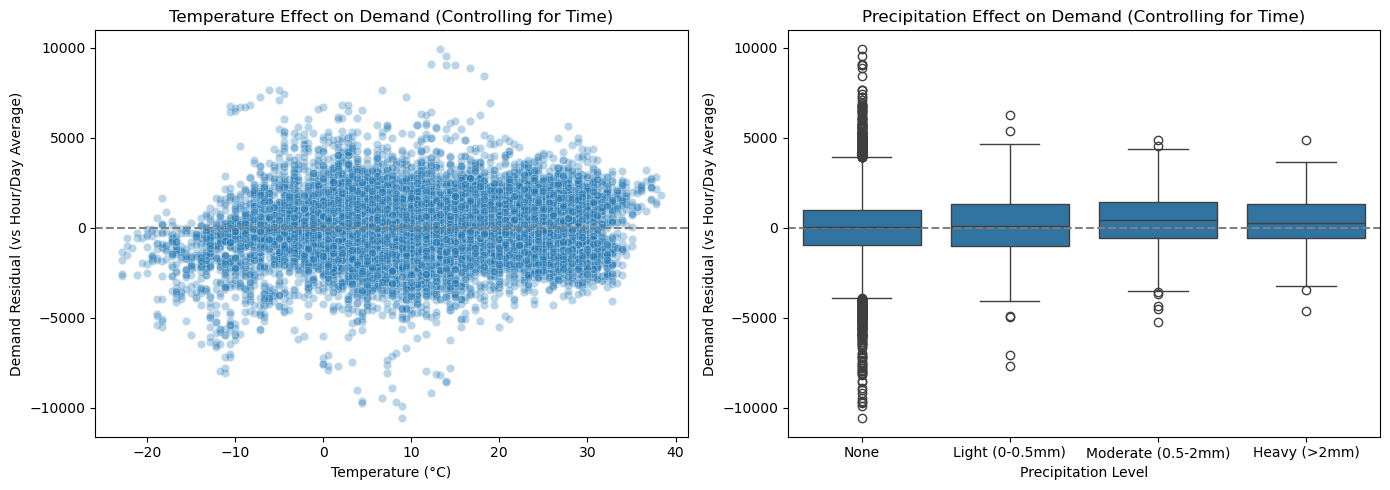

In [ ]:
# Add hour to the weather dataframe
weather_pdf["hour"] = weather_pdf["weather_hour"].dt.hour
weather_pdf["dayofweek"] = weather_pdf["weather_hour"].dt.dayofweek

# Calculate residual demand (actual - average for that hour/day combo)
hourly_avg = weather_pdf.groupby(["hour", "dayofweek"])["total_rides"].transform("mean")
weather_pdf["demand_residual"] = weather_pdf["total_rides"] - hourly_avg

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Temperature vs RESIDUAL demand
sns.scatterplot(data=weather_pdf, x="temp_c", y="demand_residual", alpha=0.3, ax=axes[0])
axes[0].axhline(y=0, color='gray', linestyle='--')
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Demand Residual (vs Hour/Day Average)")
axes[0].set_title("Temperature Effect on Demand (Controlling for Time)")

# Precipitation vs residual demand
sns.boxplot(data=weather_pdf, x="precip_category", y="demand_residual", ax=axes[1])
axes[1].axhline(y=0, color='gray', linestyle='--')
axes[1].set_xlabel("Precipitation Level")
axes[1].set_ylabel("Demand Residual (vs Hour/Day Average)")
axes[1].set_title("Precipitation Effect on Demand (Controlling for Time)")

plt.tight_layout()
plt.show()

**Analysis**

The fact that the weather had a non-material impact on rider demand was surprising and completely went against the team’s assumptions. We decided to bring in additional weather data because our experience led us to believe that bad weather increased demand and prices, but this was not the case. With this in mind, we thought weather analysis would lead us to recommend that drivers seek trips during adverse weather and that riders do the opposite. This is not the case.

Looking back, we believe that our association with weather and higher demand/prices may have been caused by confounding factors (i.e., trying to get an Uber at 3 AM when it was raining), such as high demand and low supply caused by the time of day, which would tend to be the case regardless of weather.


### **Graph 7: Surge Period Identification**

**Question:** When and where does the highest ride demand occur in Chicago?

**Answer:** The top 20 surge periods are heavily concentrated on Friday and Saturday evenings between 6:00 PM and 11:00 PM in the Near North Side neighborhood, with peak demand reaching 750+ rides per 15-minute window on Saturdays 7:00 PM.

In [ ]:
# Aggregate demand by day of week, hour, minute, AND community area
surge_df = (
    df_feat
    .filter(
        (F.col("timestamp_15m") >= "2021-02-01") &
        (F.col("timestamp_15m") <= "2022-12-31")
    )
    .withColumn("dayofweek", F.dayofweek("timestamp_15m"))  # 1=Sunday, 7=Saturday
    .withColumn("hour", F.hour("timestamp_15m"))
    .withColumn("minute", F.minute("timestamp_15m"))
    .groupBy("dayofweek", "hour", "minute", "community_name")
    .agg(F.avg("rides_count_total").alias("avg_rides"))
)

# Convert to pandas
surge_pdf = surge_df.toPandas()

# Create readable labels
day_map = {1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri", 7: "Sat"}
surge_pdf["day_name"] = surge_pdf["dayofweek"].map(day_map)
surge_pdf["time_location_label"] = surge_pdf.apply(
    lambda x: f"{x['day_name']} {x['hour']:02d}:{x['minute']:02d} - {x['community_name']}", axis=1
)

# Get top 20 surge periods
top_surge = surge_pdf.nlargest(20, "avg_rides")

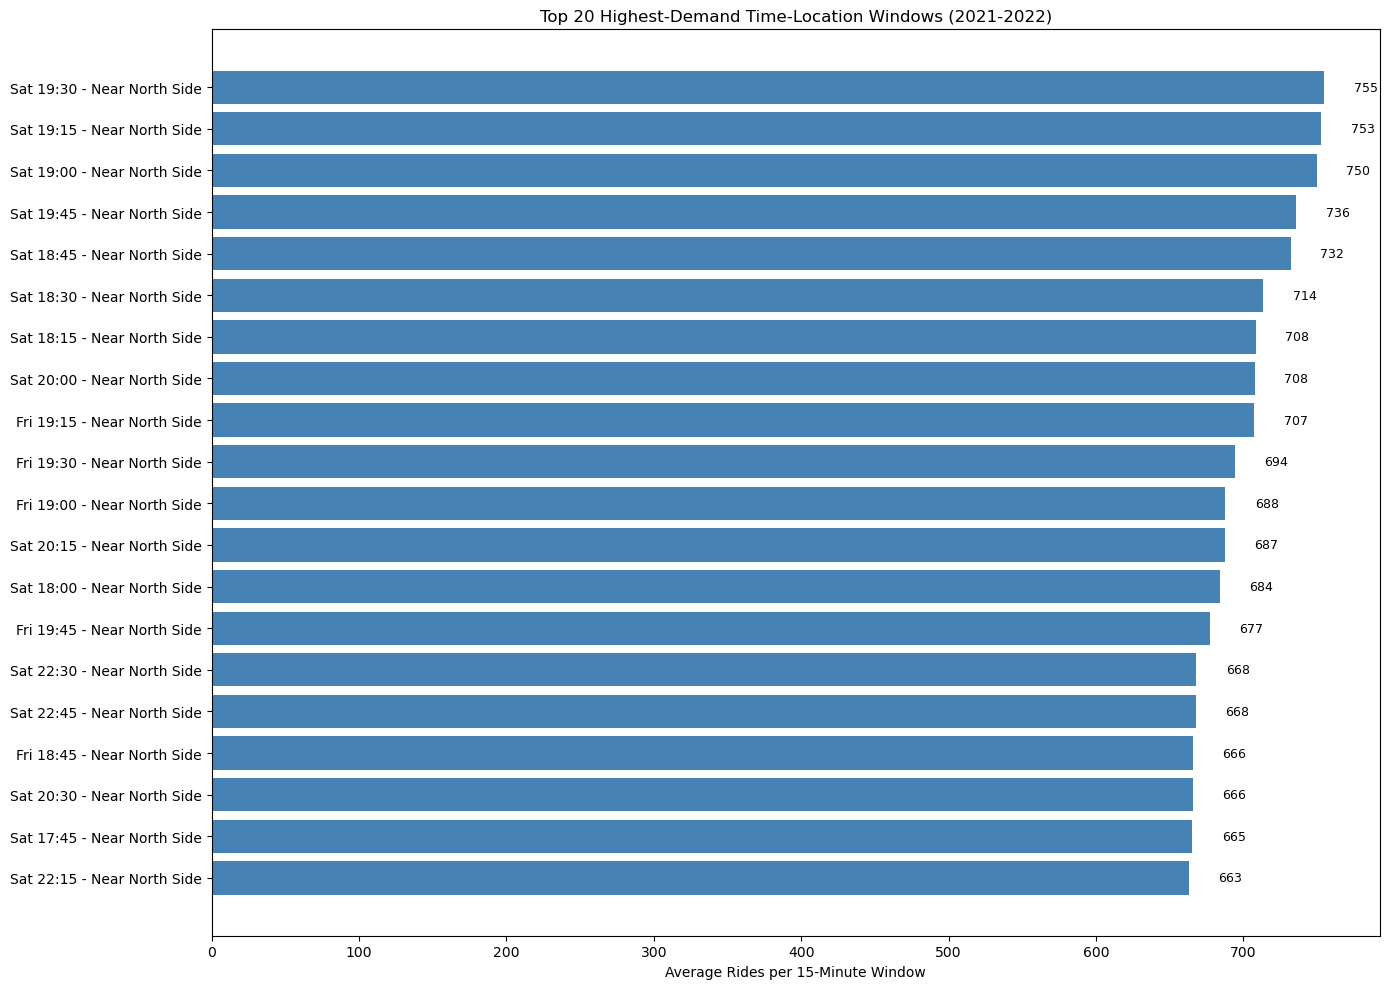


Top 20 Surge Periods by Time & Location:
        time_location_label  avg_rides
Sat 19:30 - Near North Side 754.929293
Sat 19:15 - Near North Side 752.939394
Sat 19:00 - Near North Side 749.777778
Sat 19:45 - Near North Side 736.010101
Sat 18:45 - Near North Side 732.272727
Sat 18:30 - Near North Side 713.575758
Sat 18:15 - Near North Side 708.303030
Sat 20:00 - Near North Side 707.737374
Fri 19:15 - Near North Side 707.290000
Fri 19:30 - Near North Side 694.380000
Fri 19:00 - Near North Side 687.670000
Sat 20:15 - Near North Side 687.373737
Sat 18:00 - Near North Side 684.070707
Fri 19:45 - Near North Side 677.260000
Sat 22:30 - Near North Side 668.010101
Sat 22:45 - Near North Side 667.595960
Fri 18:45 - Near North Side 665.850000
Sat 20:30 - Near North Side 665.606061
Sat 17:45 - Near North Side 665.464646
Sat 22:15 - Near North Side 662.828283


In [ ]:
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(figsize=(14, 10))

# Sort for display
top_surge_sorted = top_surge.sort_values("avg_rides", ascending=True)

bars = ax.barh(top_surge_sorted["time_location_label"], top_surge_sorted["avg_rides"], color="steelblue")
ax.set_xlabel("Average Rides per 15-Minute Window")
ax.set_ylabel("")
ax.set_title("Top 20 Highest-Demand Time-Location Windows (2021-2022)")

# Add value labels
for bar, val in zip(bars, top_surge_sorted["avg_rides"]):
    ax.text(val + 20, bar.get_y() + bar.get_height()/2, f"{val:,.0f}",
            va="center", fontsize=9)

plt.tight_layout()
plt.show()

# Print summary
print("\nTop 20 Surge Periods by Time & Location:")
print(top_surge[["time_location_label", "avg_rides"]].to_string(index=False))

**Analysis**

With this finding, it is important to provide the context (Although it may be obvious) that the Near North Side is one of the vibrant and heavily trafficked areas in Chicago. This area is home to some of Chicago’s biggest attractions, a dense dining and nightlife scene, high-income residences, large employers, has easy transportation access, and many hotels. This context is key to clarifying why this area pops up at the top of almost all neighborhood-level analyses and, therefore, should be a place where drivers can expect to be matched to trips easily and riders to be picked up almost immediately.

While this analysis reinforces how conducive the Near North Side is to the FHV market, real value could be found in the popular areas outside the Near North Side. While this graph is a basic analysis and not predictive, drivers could expect to find success using this tool to identify the areas and times where demand is consistently high.


### **Graph 8: Autocorrelation Plot (ACF)**

**Question:** How strongly is current ride demand related to demand in previous time periods?

**Answer:** Demand shows very strong correlation with recent periods.

In [ ]:
# Create a city-wide time series (aggregate across all areas)
ts_df = (
    df_feat
    .filter(
        (F.col("timestamp_15m") >= "2021-02-01") &
        (F.col("timestamp_15m") <= "2022-12-31")
    )
    .groupBy("timestamp_15m")
    .agg(F.sum("rides_count_total").alias("total_rides"))
    .orderBy("timestamp_15m")
)

# Convert to pandas
ts_pdf = ts_df.toPandas()
ts_pdf = ts_pdf.set_index("timestamp_15m").sort_index()

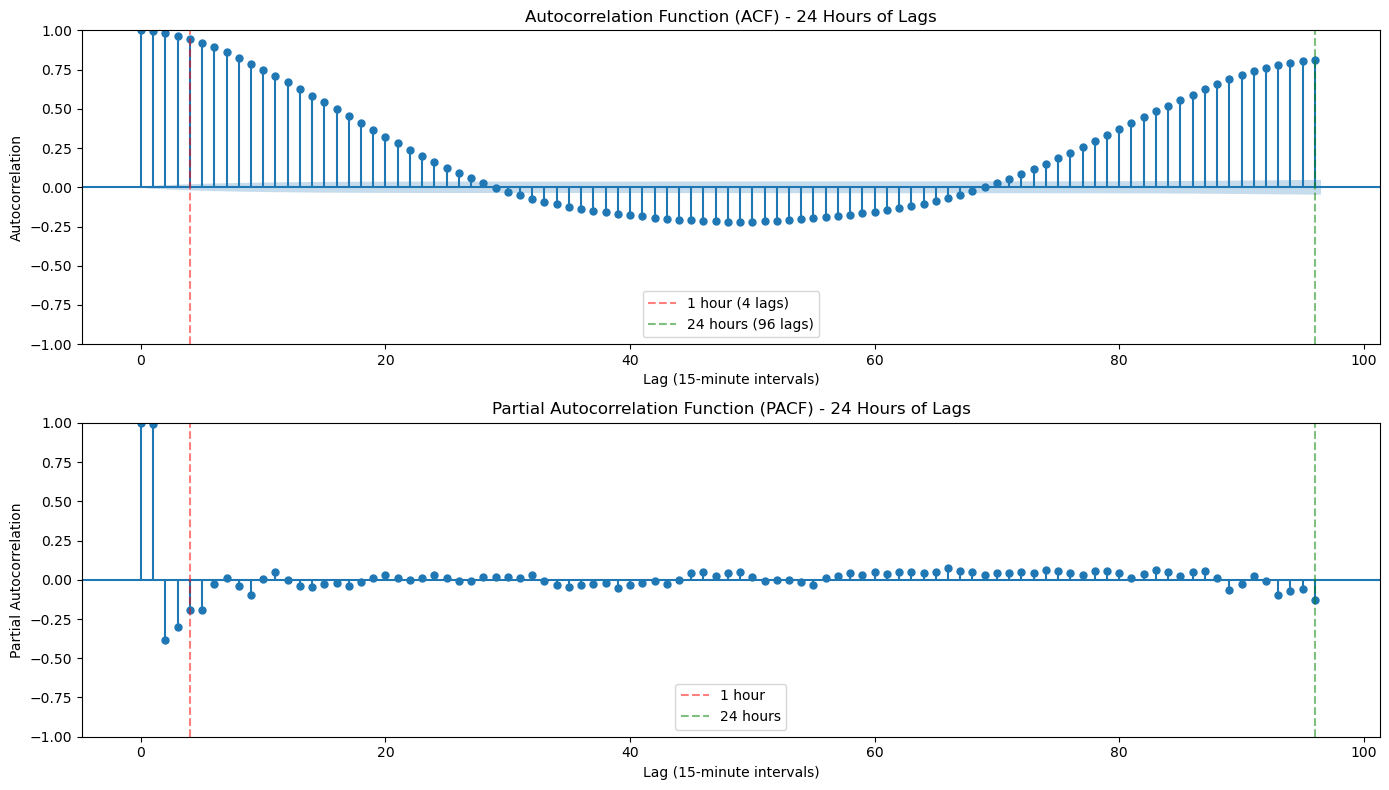


Key Autocorrelations:
  Lag 1 (15 min):   0.994
  Lag 4 (1 hour):   0.945
  Lag 8 (2 hours):  0.825
  Lag 96 (24 hours): 0.809


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# ACF - show up to 96 lags (24 hours of 15-min intervals)
plot_acf(ts_pdf["total_rides"], lags=96, ax=axes[0], alpha=0.05)
axes[0].set_xlabel("Lag (15-minute intervals)")
axes[0].set_ylabel("Autocorrelation")
axes[0].set_title("Autocorrelation Function (ACF) - 24 Hours of Lags")
axes[0].axvline(x=4, color='red', linestyle='--', alpha=0.5, label='1 hour (4 lags)')
axes[0].axvline(x=96, color='green', linestyle='--', alpha=0.5, label='24 hours (96 lags)')
axes[0].legend()

# PACF - shows direct effects (useful for AR model order)
plot_pacf(ts_pdf["total_rides"], lags=96, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_xlabel("Lag (15-minute intervals)")
axes[1].set_ylabel("Partial Autocorrelation")
axes[1].set_title("Partial Autocorrelation Function (PACF) - 24 Hours of Lags")
axes[1].axvline(x=4, color='red', linestyle='--', alpha=0.5, label='1 hour')
axes[1].axvline(x=96, color='green', linestyle='--', alpha=0.5, label='24 hours')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print key autocorrelations
print("\nKey Autocorrelations:")
from statsmodels.tsa.stattools import acf
acf_values = acf(ts_pdf["total_rides"], nlags=96)
print(f"  Lag 1 (15 min):   {acf_values[1]:.3f}")
print(f"  Lag 4 (1 hour):   {acf_values[4]:.3f}")
print(f"  Lag 8 (2 hours):  {acf_values[8]:.3f}")
print(f"  Lag 96 (24 hours): {acf_values[96]:.3f}")

**Analysis**

In simple terms, the top ACF graph indicates how well demand at a certain time predicts demand at times in the future. For example, say it is currently 5:00 PM. Lag 1 indicates that the correlation between demand at 5:00 PM and 5:15 PM is ~0.99, meaning demand at 5:00 PM is VERY good at predicting demand at 5:15 PM. Additionally, Lag 4 at ~0.80 indicates that demand at 5:00 PM today is also a very strong predictor of demand at 5:00 PM the next day.

The bottom graph shows the direct relationship between now and the past. Given that most points quickly cluster around 0, it suggests that beyond ~30 minutes, older data adds minimal information.

In the context of this project, it is a preliminary finding suggesting that an ML model predicting demand with time of day as a factor should be accurate. For example, given that our model is trained on a large swath of data covering all times of day, at different points in the year, and under various conditions, it should be able to predict demand for a 15-minute window in a given neighborhood with high accuracy. Thus, it gives drivers and riders a reliable picture of what to expect in demand at any given time and place.


### **Graph 9: Demand by Community Area Over Time**

**Question:** How has ride demand grown across Chicago's top neighborhoods from 2021-2022?

**Answer:** All top 5 areas (Near North Side, Loop, Near West Side, Lake View, O'Hare) showed substantial growth.

In [ ]:
# First identify the top 5 community areas by total demand
top_areas = (
    df_feat
    .filter(
        (F.col("timestamp_15m") >= "2021-02-01") &
        (F.col("timestamp_15m") <= "2022-12-31")
    )
    .groupBy("community_name")
    .agg(F.sum("rides_count_total").alias("total_rides"))
    .orderBy(F.desc("total_rides"))
    .limit(5)
)

top_area_names = [row["community_name"] for row in top_areas.collect()]
print("Top 5 Community Areas:", top_area_names)

# Get monthly demand for these top 5 areas
monthly_demand = (
    df_feat
    .filter(
        (F.col("timestamp_15m") >= "2021-02-01") &
        (F.col("timestamp_15m") <= "2022-12-31") &
        (F.col("community_name").isin(top_area_names))
    )
    .withColumn("month", F.date_trunc("month", "timestamp_15m"))
    .groupBy("month", "community_name")
    .agg(F.sum("rides_count_total").alias("total_rides"))
    .orderBy("month", "community_name")
)

# Convert to pandas
monthly_pdf = monthly_demand.toPandas()

Top 5 Community Areas: ['Near North Side', 'Loop', 'Near West Side', 'Lake View', "O'Hare"]


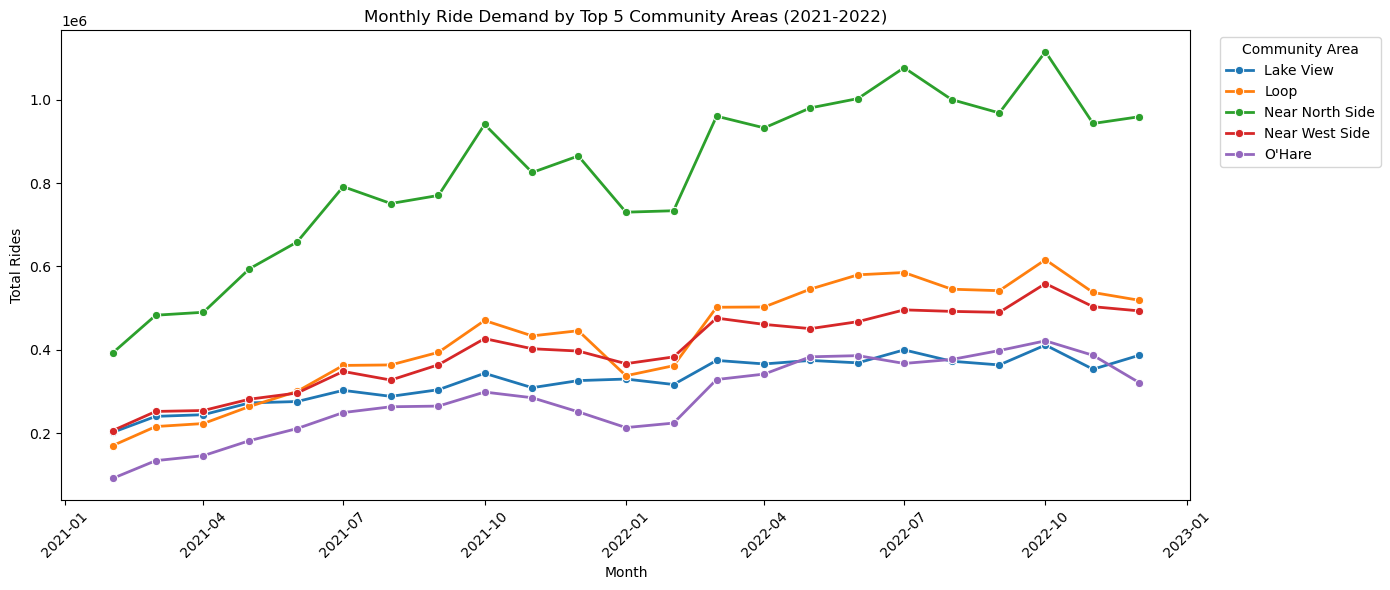


Demand Growth (First 3 months vs Last 3 months):
  Near North Side: +121.0%
  Loop: +174.7%
  Near West Side: +118.4%
  Lake View: +67.8%
  O'Hare: +204.3%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(
    data=monthly_pdf,
    x="month",
    y="total_rides",
    hue="community_name",
    marker="o",
    linewidth=2,
    ax=ax
)

ax.set_xlabel("Month")
ax.set_ylabel("Total Rides")
ax.set_title("Monthly Ride Demand by Top 5 Community Areas (2021-2022)")
ax.legend(title="Community Area", bbox_to_anchor=(1.02, 1), loc="upper left")

# Format x-axis
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print growth rates
print("\nDemand Growth (First 3 months vs Last 3 months):")
for area in top_area_names:
    area_data = monthly_pdf[monthly_pdf["community_name"] == area].sort_values("month")
    first_3 = area_data.head(3)["total_rides"].mean()
    last_3 = area_data.tail(3)["total_rides"].mean()
    pct_change = ((last_3 - first_3) / first_3) * 100
    print(f"  {area}: {pct_change:+.1f}%")

**Analysis**

The graph indicates sustained growth across all top neighborhoods post-pandemic. This trend was expected and would be interesting to see how it compares to pre-pandemic levels (Pre-pandemic data was of poor quality, so this analysis could not provide trusted insights).

For drivers and riders, they can expect reliable trips in these areas, offering a sure bet for riders to earn strong profits. However, further analysis would reveal the true value in identifying areas that are not as popular in absolute terms but have emerging demand growing at a higher rate, offering potentially lower competition to drivers and higher fares in these areas with strong demand but weaker supply.


### **Graph 10: Revenue Efficiency by Community Area (Fare per Mile vs. Demand)**

**Question:** Which neighborhoods offer drivers the best combination of high demand and high fares?

**Answer:** Near North Side is the clear winner for drivers, offering the highest demand and the highest per-mile fares. However, the graph reveals a generally clear relationship between high demand and higher fares.

In [ ]:
# Calculate average fare per mile and demand by community area
area_efficiency = (
    df_feat
    .filter(
        (F.col("timestamp_15m") >= "2021-02-01") &
        (F.col("timestamp_15m") <= "2022-12-31") &
        (F.col("fare_per_mile").isNotNull()) &
        (F.col("fare_per_mile") > 0) &
        (F.col("fare_per_mile") < 50)  # Remove outliers
    )
    .groupBy("community_name", "pickup_community_area")
    .agg(
        F.avg("fare_per_mile").alias("avg_fare_per_mile"),
        F.sum("rides_count_total").alias("total_rides"),
        F.avg("avg_trip_miles_weighted").alias("avg_trip_distance")
    )
)

# Convert to pandas
efficiency_pdf = area_efficiency.toPandas()

# Calculate rides per day for better interpretability
days_in_period = (pd.to_datetime("2022-12-31") - pd.to_datetime("2021-02-01")).days
efficiency_pdf["rides_per_day"] = efficiency_pdf["total_rides"] / days_in_period

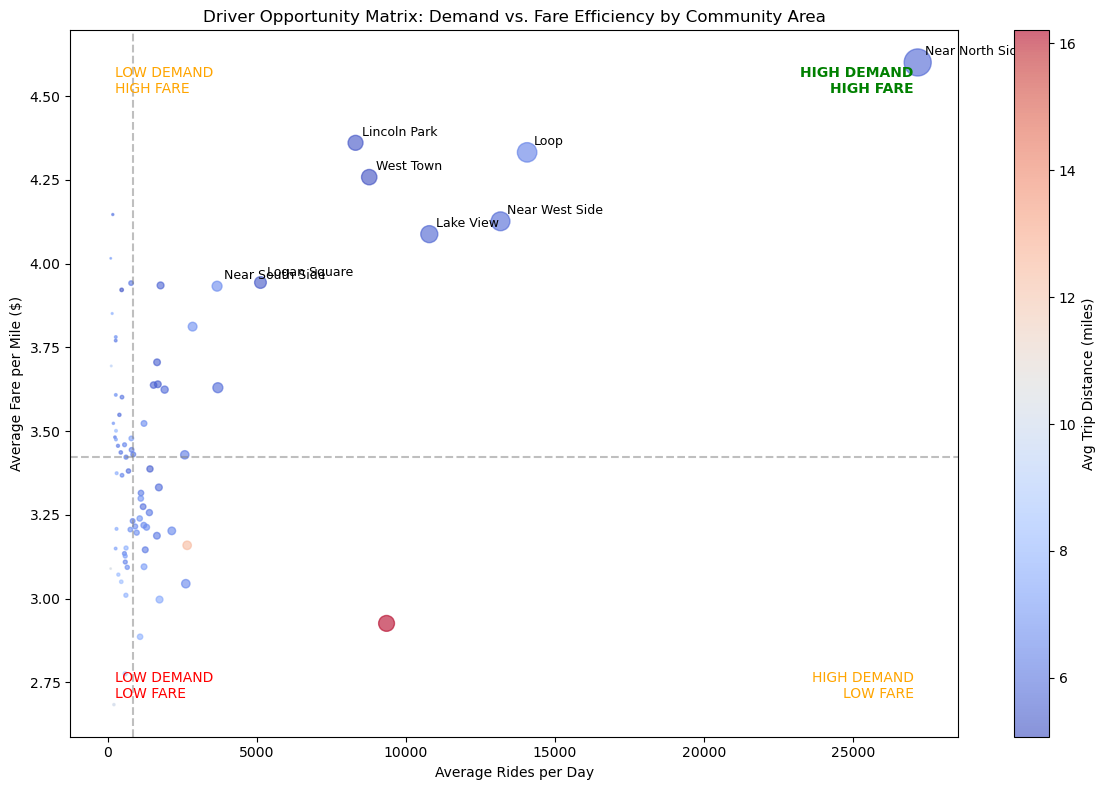


Top 'Sweet Spot' Areas (High Demand + High Fare/Mile):
 community_name  rides_per_day  avg_fare_per_mile  avg_trip_distance
Near North Side   27178.871060           4.600689           5.608423
           Loop   14067.616046           4.332220           6.301917
 Near West Side   13174.522923           4.126449           5.690500
      Lake View   10783.911175           4.088026           5.541076
   Lincoln Park    8308.022923           4.360686           5.229956
      West Town    8767.381089           4.258247           5.071856
   Logan Square    5117.130372           3.943722           5.257869
Near South Side    3660.127507           3.932699           6.677182


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot with size = total rides
scatter = ax.scatter(
    efficiency_pdf["rides_per_day"],
    efficiency_pdf["avg_fare_per_mile"],
    s=efficiency_pdf["total_rides"] / 50000,  # Scale bubble size
    alpha=0.6,
    c=efficiency_pdf["avg_trip_distance"],
    cmap="coolwarm"
)

# Add colorbar for trip distance
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Avg Trip Distance (miles)")

# Label top areas (high on both dimensions)
efficiency_pdf["score"] = (
    efficiency_pdf["rides_per_day"] / efficiency_pdf["rides_per_day"].max() +
    efficiency_pdf["avg_fare_per_mile"] / efficiency_pdf["avg_fare_per_mile"].max()
)
top_areas = efficiency_pdf.nlargest(8, "score")

for _, row in top_areas.iterrows():
    ax.annotate(
        row["community_name"],
        (row["rides_per_day"], row["avg_fare_per_mile"]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9
    )

# Add quadrant lines at medians
ax.axhline(y=efficiency_pdf["avg_fare_per_mile"].median(), color="gray", linestyle="--", alpha=0.5)
ax.axvline(x=efficiency_pdf["rides_per_day"].median(), color="gray", linestyle="--", alpha=0.5)

# Label quadrants
ax.text(0.95, 0.95, "HIGH DEMAND\nHIGH FARE", transform=ax.transAxes, ha="right", va="top", fontsize=10, color="green", weight="bold")
ax.text(0.05, 0.95, "LOW DEMAND\nHIGH FARE", transform=ax.transAxes, ha="left", va="top", fontsize=10, color="orange")
ax.text(0.95, 0.05, "HIGH DEMAND\nLOW FARE", transform=ax.transAxes, ha="right", va="bottom", fontsize=10, color="orange")
ax.text(0.05, 0.05, "LOW DEMAND\nLOW FARE", transform=ax.transAxes, ha="left", va="bottom", fontsize=10, color="red")

ax.set_xlabel("Average Rides per Day")
ax.set_ylabel("Average Fare per Mile ($)")
ax.set_title("Driver Opportunity Matrix: Demand vs. Fare Efficiency by Community Area")

plt.tight_layout()
plt.show()

# Print the sweet spots
print("\nTop 'Sweet Spot' Areas (High Demand + High Fare/Mile):")
print(top_areas[["community_name", "rides_per_day", "avg_fare_per_mile", "avg_trip_distance"]].to_string(index=False))

**Analysis**

While this graph is an extremely valuable tool for drivers, as it shows that the most popular areas offer them the most value, it also provides a key insight into the surge-pricing algorithms of the TNPs that comprise the majority of this dataset. It shows the algorithms have learned that these areas are heavily trafficked and riders have a higher willingness to pay here, which is why it is the most prominent high-demand x high-fare area.

Further, it really reveals the “challenge” riders face: the areas they frequent most naturally have the highest demand and the highest prices. Our hope with this finding is that drivers of both TNPs and Taxis will continue to benefit from this demand and go to these areas in higher droves, so that riders get some price relief and faster ride matching.


### **Graph 11: Top 20 areas with Highest Fare**

**Question:** Which community areas generate the most total revenue?

**Answer:** Near North Side dominates with approximately 750M in revenue proxy, followed by O'Hare with 600M and Loop 450M.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

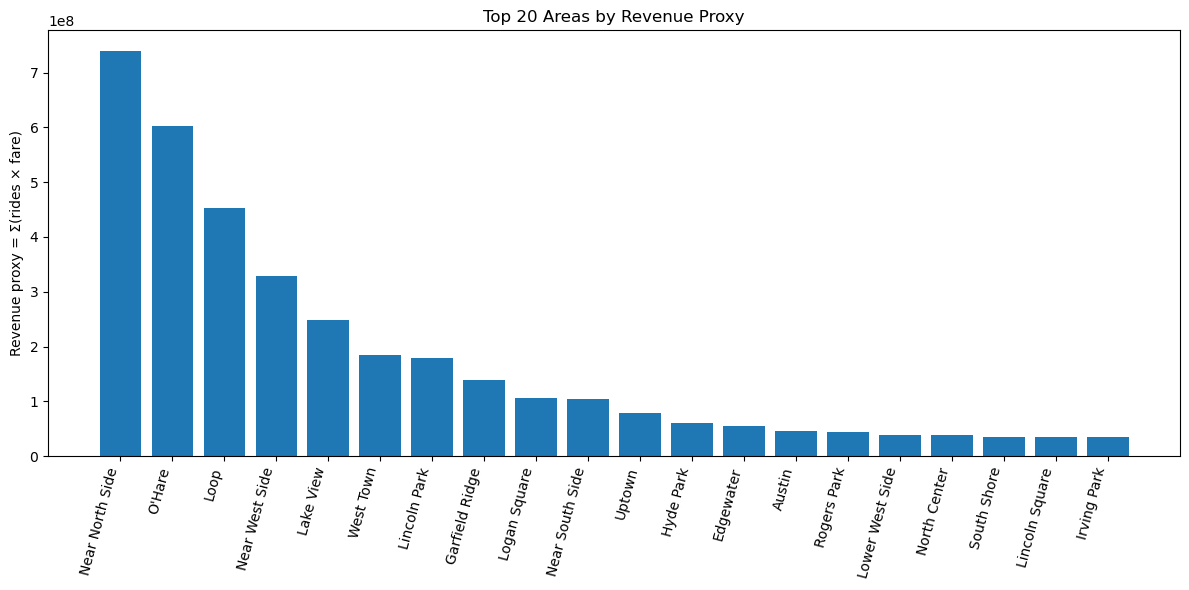

In [ ]:
df_rev = df_named.withColumn(
    "revenue_proxy",
    F.col("rides_count_total") * F.col("avg_fare_weighted")
)

area_rev = (
    df_rev.groupBy("pickup_community_area", "community_name")
          .agg(F.sum("revenue_proxy").alias("total_revenue_proxy"))
          .orderBy(F.desc("total_revenue_proxy"))
          .limit(20)
          .toPandas()
)

plt.figure(figsize=(12,6))
plt.bar(area_rev["community_name"], area_rev["total_revenue_proxy"])
plt.xticklabels = plt.xticks(rotation=75, ha="right")
plt.ylabel("Revenue proxy = Σ(rides × fare)")
plt.title("Top 20 Areas by Revenue Proxy")
plt.tight_layout()
plt.show()


**Analysis**

While this is a less granular version of Graph 10, painting the revenue share picture in absolute terms is valuable. It speaks to both the high volume and high fares found in these top areas.

In this case, O’Hare taking the #2 spot is significant, as airports in any city are the default place for FHVs to achieve high fares. When taking the findings from Graphs 9, 10, and 11 together, it reveals a massive opportunity for drivers pursuing trips at O’Hare. This is because it has the lowest volume of the top five areas and does not visibly appear on the efficiency graph. When taken together, this suggests that the trips from O’Hare are lucrative, even though they might be longer and fewer in number. Logically, this makes sense: while airports are high-traffic areas, there are ample transport options, and commuter volume on any given day is likely lower than at the busiest parts of the inner city.

Thus, if drivers can achieve strong fuel economy, O’Hare may provide some of the best earning opportunities in the city.


### **Graph 12: Lorenz curve + Gini coefficient (rides across all areas)**

**Question:** How concentrated is ride demand across Chicago's community areas?

**Answer:** The Gini coefficient of 0.71 indicates highly unequal distribution of rides across neighborhoods.

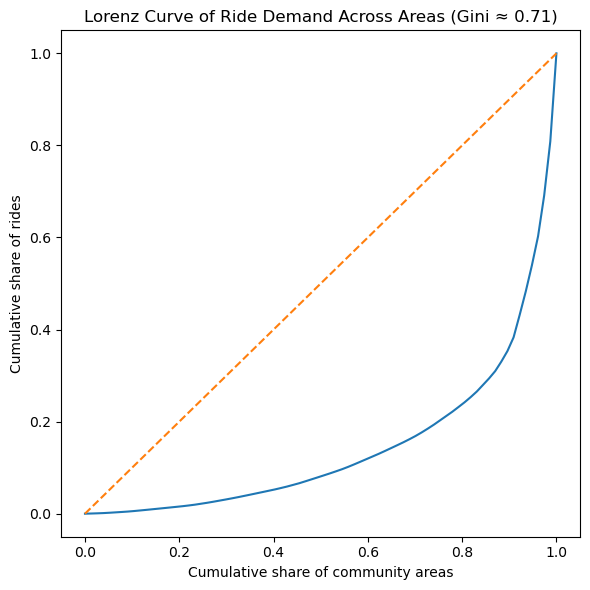

In [ ]:
area_all = area_rides.toPandas()

# Sort ascending by rides
area_all = area_all.sort_values("total_rides").reset_index(drop=True)

n = len(area_all)
area_all["cum_area_share"] = [(i+1)/n for i in range(n)]
area_all["cum_ride_share"] = area_all["total_rides"].cumsum() / area_all["total_rides"].sum()

# Gini coefficient approximation: 1 - 2 * area under Lorenz curve
lorenz_x = [0] + area_all["cum_area_share"].tolist()
lorenz_y = [0] + area_all["cum_ride_share"].tolist()

gini = 1 - 2 * pd.Series(lorenz_y).rolling(2).mean().iloc[1:].dot(
    pd.Series(lorenz_x).diff().iloc[1:]
)

plt.figure(figsize=(6,6))
plt.plot(lorenz_x, lorenz_y)
plt.plot([0,1], [0,1], linestyle="--")  # equality line
plt.xlabel("Cumulative share of community areas")
plt.ylabel("Cumulative share of rides")
plt.title(f"Lorenz Curve of Ride Demand Across Areas (Gini ≈ {gini:.2f})")
plt.tight_layout()
plt.show()


**Analysis**

The purpose of the Lorenz Curve and Gini Coefficient combo is to assess market concentration. Given that the coefficient is at 0.71, this suggests that the market is concentrated in a limited number of areas, a finding consistent with what we have seen so far.

It is clear that riders and the masses of the people in Chicago (Citizens and visitors alike) frequent a select few areas. Until that changes, causing the Gini Coefficient to decrease, drivers will continue to be incentivized to frequent these areas.


### **Graph 13: Fare-per-mile distribution by top-10 areas**

**Question:** How consistent are fares within each high-demand neighborhood?

**Answer:** Most top areas show relatively tight fare distributions around $3-5/mile with some outliers.

<Figure size 1000x600 with 0 Axes>

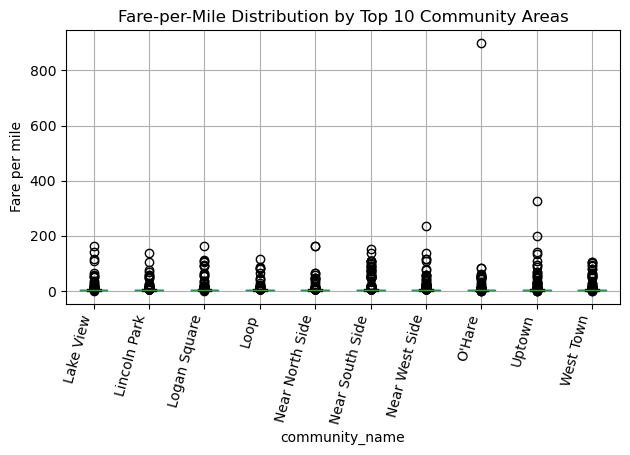

In [ ]:
df_fpm = df_named.withColumn(
    "fare_per_mile",
    F.col("avg_fare_weighted") / F.when(F.col("avg_trip_miles_weighted") > 0,
                                        F.col("avg_trip_miles_weighted"))
).filter(F.col("fare_per_mile").isNotNull())

# Top-10 areas by total rides
top10_areas = (
    df_fpm.groupBy("pickup_community_area", "community_name")
          .agg(F.sum("rides_count_total").alias("total_rides"))
          .orderBy(F.desc("total_rides"))
          .limit(10)
          .select("pickup_community_area")
          .rdd.flatMap(lambda r: r)
          .collect()
)

df_fpm_top10 = df_fpm.filter(F.col("pickup_community_area").isin(top10_areas))

# Sample to keep size reasonable
pdf_fpm = df_fpm_top10.sample(False, 0.02, seed=42).toPandas()

plt.figure(figsize=(10,6))
# order labels by overall rides (from area_rides above or from this sample)
order = (pdf_fpm.groupby("community_name")["fare_per_mile"]
               .median()
               .sort_values()
               .index.tolist())

pdf_fpm.boxplot(column="fare_per_mile", by="community_name", positions=None)
plt.xticks(rotation=75, ha="right")
plt.ylabel("Fare per mile")
plt.title("Fare-per-Mile Distribution by Top 10 Community Areas")
plt.suptitle("")
plt.tight_layout()
plt.show()


**Analysis**

While previous analysis has suggested that certain areas tend to command higher fares per mile, this graph shows that, overall, fares are consistent across locations.

This is not to say that previous findings were wrong; it is just that the differences in fare/mile, even in those instances, were usually less than a single dollar per mile. Thus, while cents can add up over time, drivers should not expect large fluctuations in income based on the areas they frequent, and riders should not expect similar fluctuations in their rate based on their pickup location.


### **Graph 14: Volatility scatter: mean rides vs coefficient of variation (CV)**

**Question:** Which areas have stable vs. unpredictable demand patterns?

**Answer:** High-demand areas (Near North Side, Loop, Near West Side, Lake View, O'Hare) show moderate volatility, while low-demand areas show higher relative volatility.

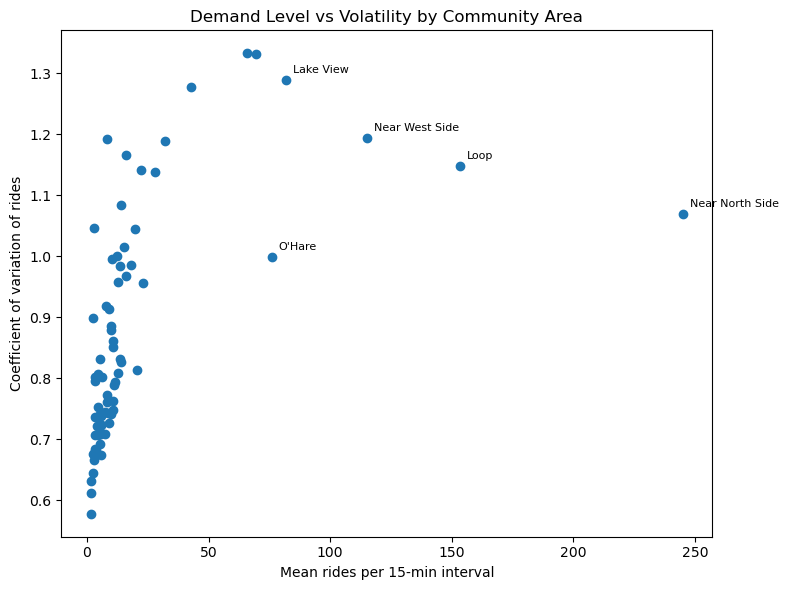

In [ ]:
area_stats = (
    df_named.groupBy("pickup_community_area", "community_name")
            .agg(
                F.mean("rides_count_total").alias("mean_rides"),
                F.stddev("rides_count_total").alias("std_rides"),
                F.count("*").alias("n_obs")
            )
)

area_stats = area_stats.filter(F.col("n_obs") > 0)

area_stats_pd = area_stats.toPandas()
area_stats_pd["cv_rides"] = area_stats_pd["std_rides"] / area_stats_pd["mean_rides"]

plt.figure(figsize=(8,6))
plt.scatter(area_stats_pd["mean_rides"], area_stats_pd["cv_rides"])
plt.xlabel("Mean rides per 15-min interval")
plt.ylabel("Coefficient of variation of rides")
plt.title("Demand Level vs Volatility by Community Area")

# Optionally label some extreme points
for _, row in area_stats_pd.nlargest(5, "mean_rides").iterrows():
    plt.annotate(row["community_name"],
                 (row["mean_rides"], row["cv_rides"]),
                 xytext=(5, 5), textcoords="offset points", fontsize=8)

plt.tight_layout()
plt.show()


**Analysis**

The findings here make sense because the higher number of trips across these top areas allows slight demand fluctuations to be “lost in the wash” of consistently high demand (i.e., an increase in 5 rides for an area with a mean of 5 rides corresponds to a 100% increase, while that same increase for an area with a mean of 100 is only a 5% increase.

Again, the reliability of demand in these top areas reinforces that these are the best places for drivers to find work and for riders to secure transport easily. It also supports our findings from the ACF graph, as stable demand in high-volume areas increases the predictive power of data from rides in these areas.


### **Graph 15: Demand by Day and Hour**

**Question:** What are the overall demand patterns throughout the week?

**Answer:** There are clear patterns: weekday demand peaks during morning rush (7:00-(:00 AM) and evening rush (5:00-7:00 PM), while weekends (Especially Friday and Saturday) show strongest demand in evening hours (7:00 PM-midnight), with lower morning activity.

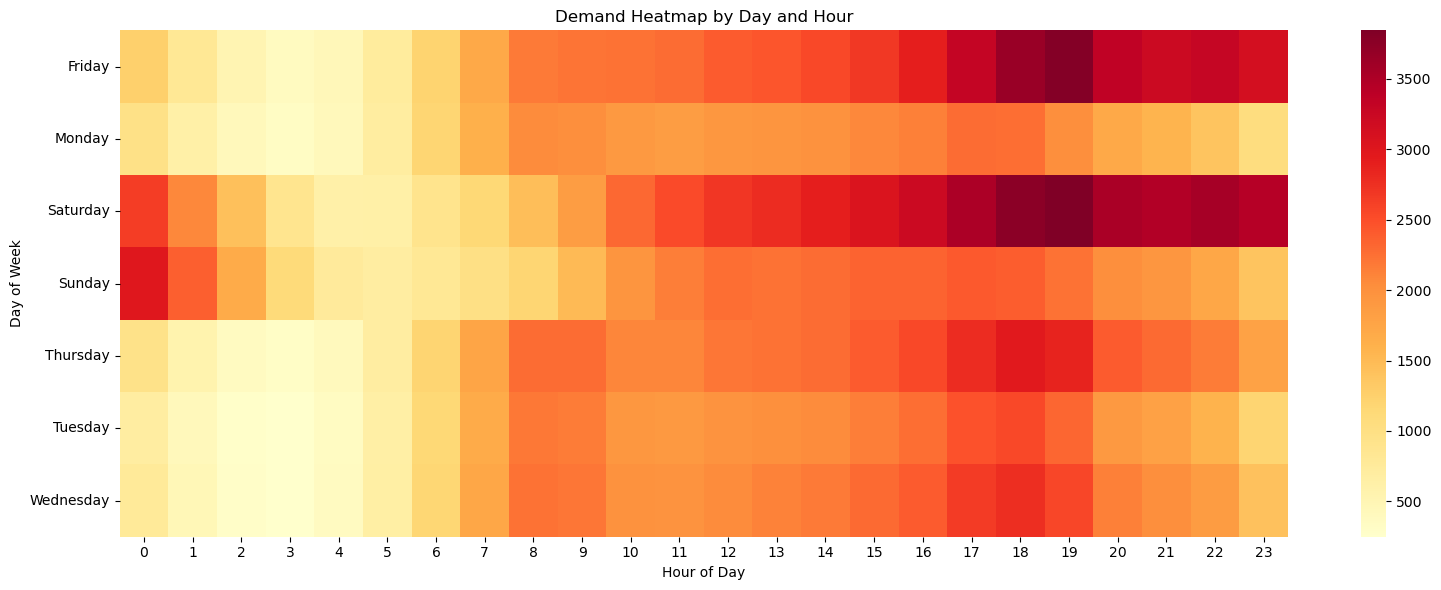

In [ ]:
pdf['hour'] = pdf['timestamp_15m'].dt.hour
pdf['day'] = pdf['timestamp_15m'].dt.day_name()

pivot = pdf.pivot_table(
    values="rides_count_total",
    index="day",
    columns="hour",
    aggfunc="mean"
)

plt.figure(figsize=(16,6))
sns.heatmap(pivot, cmap="YlOrRd")
plt.title("Demand Heatmap by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

**Analysis**

The insights from this graph are intuitive but interesting to see. The behaviors of people living in urban settings are observable here, through a day and hour FHV matrix:

Monday and Tuesday show low activity as people work through the beginning of the week, Wednesday is still low but shows more life as people have gotten through half of the week, Thursday shows more activity at night and the first pop in volume into the early morning hours of Friday as some people enjoy a Thursday night out, Friday and Saturday show massive bumps in activity as citizens and tourists have days off and are more inclined to recreate during the day and stay out late, demanding rides in the early morning hours, but not in the standard pre-work hours as they sleep in and relax at home.

In short, drivers can find great opportunities in understanding how ordinary people go about their weeks, where they can expect to “rake it in” starting midday Friday through the early hours of Sunday.

While a lot of analysis has been conducted, if drivers simply go to prime locations during peak hours, they can expect to succeed by best serving those who need rides as they go about their weekly routines.


### **Critical Observations**

From the new graphs in our analysis, the major, overarching insights we found are:

1. Demand is heavily correlated to both similar times across days (i.e., 5:00 PM on Monday and 5:00 PM on Tuesday) and times +/- 30 minutes at any point in a day (i.e. Demand at 5:30 PM is highly similar to demand up to 6:00 PM or down to 5:00 PM.

2. Demand is heavily influenced by location, where these locations provide drivers with the highest volumes of trips and revenue potential, while assuring riders efficient access to trips if located in these areas.

While we hoped to uncover trends with market-shifting potential, the reality is that citygoers frequent the places they do for good reasons, and there is no reason to believe these habits will change. Subsequently, drivers should and will continue to go to these areas for the most reliable streams of income.

Thus, while a strong predictive model can help drivers capitalize on high demand in areas with less competition, the FHV market in Chicago is centered on the most popular places, and that is ultimately where their services are needed most, according to the data.


## **Conclusion**

In conclusion, it is clear that this project departed from the goals set out in the proposal and in the first phase, where we planned to pit TNPs and Taxis against each other to compare their performance and develop mode-specific strategies to improve their standing. However, Phase 1 revealed that there is virtually no contest between the dominant TNPs and Taxis serving relatively ultra-low-volume. Therefore, we shifted our focus to assess demand across modes to get a complete picture of the FHV market, so we could understand demand dynamics and benefit all *individuals* involved in the market: Riders, TNP drivers, and Taxi drivers.

Our core findings highlighted how:

1. Time, in terms of the same time across days and periods, within thirty minutes of any given time, is highly predictive of demand.

2. There are a few core areas, namely Near North Side, O’Hare (Airport), and Loop, among a few others, that account for the majority of trip volume and revenue, indicating a reliable source of supply and demand where riders can quickly obtain rides, and drivers can reliably earn income.

The main recommendation to emerge from these findings is that if drivers of both TNPs and Taxis flock to these high-volume areas in greater numbers than they currently do, riders will benefit from lower prices that come with increased supply, and drivers will always have access to trips. This insight is simplistic and mainly geared towards benefiting drivers, as they are the only ones with the agency to initiate this new dynamic. However, if the dynamics do change as a result of driver action, riders can expect lower transport costs when visiting their favorite places in Chicago.

Further, with a reliable *RandomForestRegressor* machine learning model, drivers can better pinpoint when and where demand is highest, and riders can optimize their FHV summoning plans. Additionally, having reliable predictions for lower demand areas can allow drivers to unlock largely untapped value in emerging areas, spurring easier access and potential community development as citygoers come to understand that these once emerging areas have reliable and affordable transportation.

In the end, this project provides valuable insights into Chicago’s FHV market, with general findings that can be extrapolated to other large US cities, given Chicago’s status as one of the nation's premier metro areas. With the addition of more recent data, we believe this analysis could provide extremely valuable insights to all parties involved in the FHV markets and have immediate benefits if put into action.



## **Challenges**

* The main challenge we faced was balancing cost and performance optimization within the cluster. Firstly, we burned through our team’s credits multiple times, starting with our first cluster, whose configuration was too expensive and had more compute than was *fully* necessary for our analysis and data size. Secondly, in the last phase of the project, when we were trying to create graphs and run ML in different notebooks within the cluster simultaneously, the kernels would break and we would have to restart the cluster completely. Ultimately, the crux of the challenge was that we could have benefited from a larger/more powerful cluster to improve analysis efficiency and capacity, but cost constraints made this impossible. This forced us to grapple with decisions that define big data, and we had to compromise some ML depth and design creativity to work within the confines of our compute resources. This exemplified the idea that big data insights do not “just happen” but require extensive resources and careful code design to achieve results while maintaining economic practicality.

* A second challenge we faced was also related to cost and maintaining working kernels, but it was not directly related to analysis: We decided to isolate the analysis and write-up by running the analysis in the cluster and then downloading these files, merging them together, and then completing the write-up in Colab. Our thought process with this was to limit cluster uptime to only when code was being executed, to minimize costs, while preventing code or Markdown changes from being lost if team members were working in a single notebook simultaneously. While this approach did achieve these two goals, the notebook download process was inefficient and cumbersome, requiring a lot of extra manual effort that added no material value to the analysis and provided no means to efficiently implement changes made in the analysis files to the write-up workbook. This demonstrates the benefits/control offered in cloud-native environments, as well as the drawbacks of reliance on notebooks. Still, we achieved our goals with this approach.

* The last challenge focuses on the quality of our analysis. First off, given that we were dealing with a data range split into pre- and post-pandemic periods, with pre-pandemic data of low quality, our final analysis was limited to the post-pandemic data (Starting in 02/2021), whose latest entry was from late 2022. In short, we had less data to work with than we originally anticipated, and its relevance/applicability to today is questionable, given that the economy has changed so much over the past three years. While we believe our findings would largely hold today, having additional, more recent data would have enabled us to build a more relevant and trusted analysis and a more reliable ML model.


## **Generative AI Disclosure**

In this final phase of the project, we utilized Gen AI (A mix of ChatGPT, Claude, and Gemini) in a similar fashion to the previous phase. However, this time around, we found that more extensive “vibe-coding” was beneficial, as we pursued more targeted EDA, which required more specialized graphs. For example, without Gen AI, the process of creating the ACF and Revenue Efficiency graphs would have taken multiple hours if done manually, but took less than five minutes when combined with AI, reducing the time to insight while vastly improving quality.

In general, the following is how we used Gen AI in this phase:

* For both the ML and graphical analysis, we had a clear vision of what we wanted to do saved in documents and a strong existing codebase, allowing us to feed these materials to LLMs in conjunction with detailed prompts, leading us to quickly generate and test code, which was often sufficient on the first try. With the first portion of our project complete and a clear path forward, we generated code efficiently using the LLM, as the model received inputs that defined our unique context and structure, reducing its need to reason as it clearly understood our project requirements and the data we were working with.

* For analysis, we used it to sanity check our understanding of the graphs. Specifically, we would feed an image of a given graph with our understanding and ask whether our reasoning was sound. For example, for “Graph 6: Weather Impact on Demand (Temperature and Precipitation),” we said, “This output is showing that weather does not have a material effect on demand, correct?” Additionally, for advanced visualizations like the ACF graph, we asked it to provide a simple explanation of its functionality/purpose before asking it to confirm our findings, allowing us to include a basic yet accurate theoretical example that captures its insights perfectly.

* We also used LLMs for basic conceptual questions throughout the process. While its responses to these inquiries did not appear *directly* in our work, these insights assured that we pursued a direction that best accomplished our goals and provided conceptually accurate explanations.

* As expected, we also used LLMs for debugging and code optimization throughout the phase. This was especially important in optimizing workflows and adhering to PySpark’s unique conventions.


## **References**

1. Alphabet Inc. (n.d.). Google Gemini. Google. https://gemini.google.com/


2. Anthropic PBC. (n.d.). Claude.AI. Anthropic. https://www.anthropic.com/


3. City of Chicago. (2023, March 29). Transportation network providers - trips (2018 - 2022): City of Chicago: Data Portal. Chicago Data Portal. https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips-2018-2022-/m6dm-c72p/about_data


4. City of Chicago. (2024, February 7). Taxi trips (2013-2023): City of chicago: Data Portal. Chicago Data Portal. https://data.cityofchicago.org/
Transportation/Taxi-Trips-2013-2023-/wrvz-psew/about_data


5. National Oceanic and Atmospheric Administration. (n.d.). Integrated Surface Dataset (Global) (Version Superseded). National Centers for Environmental Information (NCEI). https://www.ncei.noaa.gov/access/search/data-search/global-hourly


6. OpenAI. (n.d.). ChatGPT. OpenAI. https://openai.com/


7. Soltanieh Ha, M. (2025). BA843 E1 Big Data Analytics for Business (Fall 25). Lectures 1-13. Boston ; Boston University: Questrom School of Business.